# INTRODUCTION

   Dans ces travaux pratiques, il est question de programmer les différents algorithmes d'Apprentissage Automatique vus en cours afin de les comparer avec les fonctions de MachineLearning déjà implémentées dans la bibliothèque python "sklearn".
    
    
   Ces algorithmes sont : ceux de la classification statistique Non Bayésiennes(K plus proche voisin, Séparation Linéaire("Perceptron Linéaire" et "Arbre de décision")) et la structure la plus utilisée de réseaux de neuronnes(Perceptron multi-couches).

   L'objectif de ces travaux pratiques serait premièrement de comparer les différents algorithmes; en tenant compte de leurs logiques de fonctionnement, leurs performances sur plusieurs types de jeu de  données(datasets) afin d'en tirer les conclusions en l'occurence, dégager les avantages, inconvénients et le type de jeu de données auquel le méthode serait adaptée. 
Deuxièmement, d'explorer la bibliothèque python "sklearn" en vue de comprendre l'usage de différentes fonctions et l'impact de leurs paramètres dans les résultats.

Il sied de signaler que ces algorithmes nous permettent de créer un modèle de classification(par entrainement du modèle à l'aide de données d'apprentissage). Nous évaluerons les performances de ce modèle puis nous le testerons.

## TRAVAIL PRATIQUE NUMERO 1 : PERCEPTRON LINEAIRE

In [6]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

# I. One vs One

In [7]:
def transformation(c1,c2):
    x=c1.shape[0]
    y=c1.shape[1]
    un=np.ones((x,1))
    c1n = np.hstack((c1,un))
    c2n = -np.hstack((c2,un))
    concat= np.concatenate((c1n,c2n))
    return concat

In [8]:
def perceptron(method):
    donnee = method
    vector = np.zeros(3)
    n = 100
    for i in range(n):
        tamp = vector
        for j in range(len(donnee)):
            tab=vector.T@donnee[j]
            if tab <= 0:
                vector = vector + donnee[j]
        if (vector==tamp).all():
            break              
    return vector

### 1.TEST SUR LE JEU DE DONNEES TP1

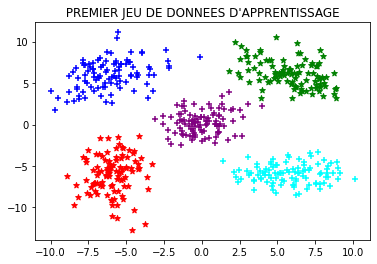

In [11]:
# Importation Données Apprentissage

dataTp1_App=pd.read_csv('data_tp1_app.txt',delimiter=' ',header=None)
dataTp1_App=dataTp1_App.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp1_App.loc[0:99]
class2=dataTp1_App.loc[100:199]
class3=dataTp1_App.loc[200:299]
class4=dataTp1_App.loc[300:399]
class5=dataTp1_App.loc[400:499]
#
#fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)

plt.title(" PREMIER JEU DE DONNEES D'APPRENTISSAGE ")


A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+',label='classe3')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*',label='classe4')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+',label='classe5')]


  ***** PREMIER JEU DE DONNEES ***** 


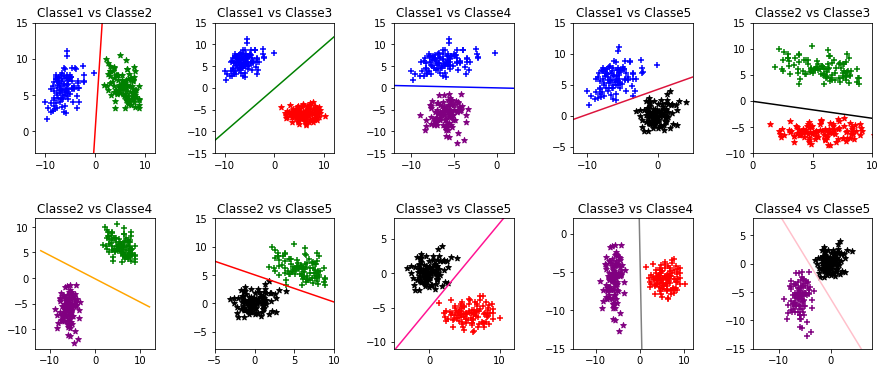

In [12]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

print("  ***** PREMIER JEU DE DONNEES ***** ")

plt.subplot(2,5,1)
plt.title("Classe1 vs Classe2")
d1=perceptron(transformation(class1,class2))  
x1= np.linspace(-12,12,2)
y1= (-d1[2] - (d1[0])*x1)/d1[1]
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class2[1],class2[2], c = 'green', marker = '*')
plt.plot(x1, y1, '-r',label='c1VSc2')
plt.xlim((-12,12))
plt.ylim(-3,15)
#
plt.subplot(2,5,2)
plt.title("Classe1 vs Classe3")
d2=perceptron(transformation(class1,class3))  
x2= np.linspace(-12,12,2)
y2= (-d2[2] - (d2[0])*x2)/d2[1]
plt.plot(x2, y2, '-g',label='c1VSc3')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class3[1],class3[2], c = 'red', marker = '*')
plt.xlim((-12,12))
plt.ylim(-15,15)
#
plt.subplot(2,5,3)
plt.title("Classe1 vs Classe4")
d3=perceptron(transformation(class1,class4)) 
x3= np.linspace(-12,12,2)
y3= (-d3[2] - (d3[0])*x3)/d3[1]
plt.plot(x3, y3, '-b',label='c1VSc4')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
plt.xlim((-12,2))
plt.ylim(-15,15)
#
plt.subplot(2,5,4)
plt.title("Classe1 vs Classe5")
d4=perceptron(transformation(class1,class5))  
x4= np.linspace(-12,12,2)
y4= (-d4[2] - (d4[0])*x4)/d4[1]
plt.plot(x4, y4, 'crimson',label='c1VSc5')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.xlim((-12,5))
plt.ylim(-6,15)
#
plt.subplot(2,5,5)
plt.title("Classe2 vs Classe3")
d5=perceptron(transformation(class2,class3))  
x5= np.linspace(-12,12,2)
y5= (-d5[2] - (d5[0])*x5)/d5[1]
plt.plot(x5, y5, '-k',label='c2VSc3')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class3[1],class3[2], c = 'red', marker = '*')
plt.xlim((0,10))
plt.ylim(-10,15)
#
plt.subplot(2,5,6)
plt.title("Classe2 vs Classe4")
d6=perceptron(transformation(class2,class4)) 
x6= np.linspace(-12,12,2)
y6= (-d6[2] - (d6[0])*x6)/d6[1]
plt.plot(x6, y6, 'orange',label='c2VSc4')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
#
plt.subplot(2,5,7)
plt.title("Classe2 vs Classe5")
d7=perceptron(transformation(class2,class5)) 
x7= np.linspace(-12,12,2)
y7= (-d7[2] - (d7[0])*x7)/d7[1]
plt.plot(x7, y7, '-r',label='c2VSc5')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.xlim((-5,10))
plt.ylim(-8,15)
#
plt.subplot(2,5,8)
plt.title("Classe3 vs Classe5")
d8=perceptron(transformation(class3,class5)) 
x8= np.linspace(-12,12,2)
y8= (-d8[2] - (d8[0])*x8)/d8[1]
plt.plot(x8, y8, 'deeppink',label='c3VSc5')
plt.scatter(class3[1],class3[2], c = 'red', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.xlim((-5,12))
plt.ylim(-11,8)
#
plt.subplot(2,5,9)
plt.title(" Classe3 vs Classe4")
d9=perceptron(transformation(class3,class4)) 
x9= np.linspace(-12,12,2)
y9= (-d9[2] - (d9[0])*x9)/d9[1]
plt.plot(x9, y9, 'grey',label='c3VSc4')
plt.scatter(class3[1],class3[2], c = 'red', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
plt.xlim((-15,12))
plt.ylim(-15,2)
#
plt.subplot(2,5,10)
plt.title("Classe4 vs Classe5")
d10=perceptron(transformation(class4,class5)) 
x10= np.linspace(-12,12,2)
y10= (-d10[2] - (d10[0])*x10)/d10[1]
plt.plot(x10, y10, 'pink',label='c4VSc5')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.xlim((-15,8))
plt.ylim(-15,8)
plt.show()

### Importer les données de test.

In [16]:
data2=pd.read_csv('data_tp1_dec.txt',delimiter=' ',header=None)
h=data2.iloc[:,0]
tuple1=list(h)
#
clas1=tuple1[0:100]
clas2=tuple1[100:200]
clas3=tuple1[200:300]
clas4=tuple1[300:400]
clas5=tuple1[400:500]
len(clas5)

def make_list(clas1,clas2):
    list_Class=[]
    list_Class=clas1+clas2
    return list_Class

### Quelques fonctions importantes

In [27]:
def predictionA(classe1,classe2):
    d= np.concatenate((classe1,classe2))
    g=perceptron(transformation(classe1,classe2))
    pr1= [];pr2= [] #0
    l1=d.T[0];l2=d.T[1];n=l1.shape[0]
#
    for i in range(n):
        droite= g[0]*l1[i] + g[1]*l2[i] + g[2]
        if droite > 0:
            pr1.append(1)      #= pr1 +1
        else:
            pr2.append(2)      #= pr2+1
    liste=pr1+pr2
    return liste

In [17]:
def tauxBonneClassificationA(ConfMatrice):
    n=len(ConfMatrice)
    sommeDiag=0
    for i in range(n):
        for j in range(n):
            if i==j:
                sommeDiag +=ConfMatrice[i,j]
    taux=sommeDiag/2
    return taux


In [18]:
data_app=predictionA(class1,class2)
data_test=[1 if x==1 else 2 for x in make_list(clas1,clas2)] 
print("Taux de bonne classification classe1 vs classe2 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class1,class3)
data_test=[1 if x==1 else 2 for x in make_list(clas1,clas3)] 
print("Taux de bonne classification classe1 vs classe3 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class1,class4)
data_test=[1 if x==1 else 2 for x in make_list(clas1,clas4)] 
print("Taux de bonne classification classe1 vs classe4 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class1,class5)
data_test=[1 if x==1 else 2 for x in make_list(clas1,clas5)] 
print("Taux de bonne classification classe1 vs classe5 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class2,class3)
data_test=[1 if x==2 else 2 for x in make_list(clas2,clas3)] 
print("Taux de bonne classification classe2 vs classe3 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class2,class4)
data_test=[1 if x==2 else 2 for x in make_list(clas2,clas4)] 
print("Taux de bonne classification classe2 vs classe4 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class2,class5)
data_test=[1 if x==2 else 2 for x in make_list(clas2,clas5)] 
print("Taux de bonne classification classe2 vs classe5 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class3,class4)
data_test=[1 if x==3 else 2 for x in make_list(clas3,clas4)] 
print("Taux de bonne classification classe3 vs classe4 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class3,class5)
data_test=[1 if x==3 else 2 for x in make_list(clas3,clas5)] 
print("Taux de bonne classification classe3 vs classe5 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))
#
data_app=predictionA(class4,class5)
data_test=[1 if x==4 else 2 for x in make_list(clas4,clas5)] 
print("Taux de bonne classification classe4 vs classe5 est {}".format(tauxBonneClassificationA(confusion_matrix(data_app,data_test))))

Taux de bonne classification classe1 vs classe2 est 100.0
Taux de bonne classification classe1 vs classe3 est 100.0
Taux de bonne classification classe1 vs classe4 est 100.0
Taux de bonne classification classe1 vs classe5 est 100.0
Taux de bonne classification classe2 vs classe3 est 100.0
Taux de bonne classification classe2 vs classe4 est 100.0
Taux de bonne classification classe2 vs classe5 est 100.0
Taux de bonne classification classe3 vs classe4 est 100.0
Taux de bonne classification classe3 vs classe5 est 100.0
Taux de bonne classification classe4 vs classe5 est 100.0


### COMMENTAIRE

Le jeu de données 1 est linéaiement séparable. Toutes les classes se séparent bien les unes des autres. Et, le taux de bonne classification est de 100 pourcents pour toutes les combinaisons.

### AFFICHAGE DE TOUTES LES DONNEES ENSEMBLE

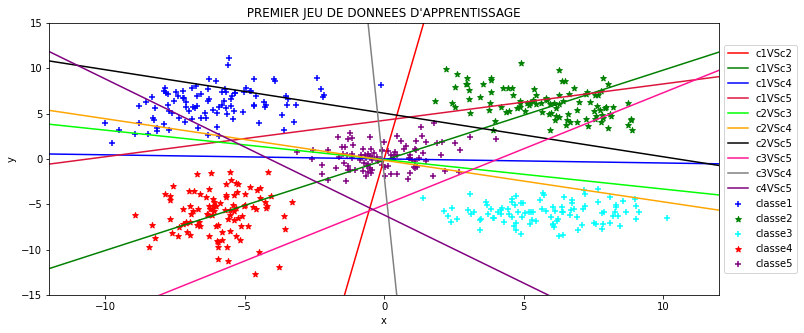

In [23]:
fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)

plt.title(" PREMIER JEU DE DONNEES D'APPRENTISSAGE ")


A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+',label='classe3')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*',label='classe4')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+',label='classe5')]

#
d1=perceptron(transformation(class1,class2))  
x1= np.linspace(-12,12,2)
y1= (-d1[2] - (d1[0])*x1)/d1[1]
plt.plot(x1, y1, '-r',label='c1VSc2')
#
d2=perceptron(transformation(class1,class3))  
x2= np.linspace(-12,12,2)
y2= (-d2[2] - (d2[0])*x2)/d2[1]
plt.plot(x2, y2, '-g',label='c1VSc3')
#
d3=perceptron(transformation(class1,class4)) 
x3= np.linspace(-12,12,2)
y3= (-d3[2] - (d3[0])*x3)/d3[1]
plt.plot(x3, y3, '-b',label='c1VSc4')
#
#
d4=perceptron(transformation(class1,class5))  
x4= np.linspace(-12,12,2)
y4= (-d4[2] - (d4[0])*x4)/d4[1]
plt.plot(x4, y4, 'crimson',label='c1VSc5')
#
d5=perceptron(transformation(class2,class3))  
x5= np.linspace(-12,12,2)
y5= (-d5[2] - (d5[0])*x5)/d5[1]
plt.plot(x5, y5, 'lime',label='c2VSc3')

#
d6=perceptron(transformation(class2,class4)) 
x6= np.linspace(-12,12,2)
y6= (-d6[2] - (d6[0])*x6)/d6[1]
plt.plot(x6, y6, 'orange',label='c2VSc4')
#
d7=perceptron(transformation(class2,class5)) 
x7= np.linspace(-12,12,2)
y7= (-d7[2] - (d7[0])*x7)/d7[1]
plt.plot(x7, y7, '-k',label='c2VSc5')
#
d8=perceptron(transformation(class3,class5)) 
x8= np.linspace(-12,12,2)
y8= (-d8[2] - (d8[0])*x8)/d8[1]
plt.plot(x8, y8, 'deeppink',label='c3VSc5')
#
d9=perceptron(transformation(class3,class4)) 
x9= np.linspace(-12,12,2)
y9= (-d9[2] - (d9[0])*x9)/d9[1]
plt.plot(x9, y9, 'grey',label='c3VSc4')
#
d10=perceptron(transformation(class4,class5)) 
x10= np.linspace(-12,12,2)
y10= (-d10[2] - (d10[0])*x10)/d10[1]
plt.plot(x10, y10, 'purple',label='c4VSc5')

#
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#
plt.xlabel('x')
plt.ylabel('y')
#
plt.xlim((-12,12))
plt.ylim(-15,15)
#
#plt.legend()
plt.show()

### NOTA:
Le perceptron linéaire comme son nom l'indique, est l'algorithme le plus simple de séparation linéaire qui permet de classifier les données linéairement séparables en nous fournissant une droite comme hyperplan. 


L'algorithme du perceptron linéaire écrit ci-haut ne converge pas pour les jeux de données non linéairement séparables puisqu'il ne renvoie pas forcément le meilleur des hyperplans.

Améliorons-le de facon à renvoyer de tous les hyperplans possibles, celui qui commet la plus petite erreur(le meilleur hyperplan).

### II. ADAPTATION DE L'ALGORITHME

Nous créeons pour ce faire une fonction qui calcule l'erreur d'apprentissage pour un hyperplan trouvé. Nous allons ensuite faire appel à cette fonction pour calculer le taux d'erreur de tous les hyperplans renvoyés dans notre fonction Perceptron_adaptée.

In [29]:
#Fonction qui renvoie le taux d'erreur

def erreur(classe1,classe2,g):
    d= np.concatenate((classe1,classe2))
    #g=perceptron(transformation(classe1,classe2)) 
    pr1=0;pr2= 0; le=[]
    l1=d.T[0];l2=d.T[1];n=l1.shape[0]
#
    for i in range(n):
        droite= g[0]*l1[i] + g[1]*l2[i] + g[2]
        if droite > 0:
            pr1=pr1 +1
        else:
            pr2=pr2+1
    le.append(pr1)
    le.append(pr2)
    for j in range(len(le)):
        if le[j]>100:
            err=(le[j]-100)/2
        else:
            err=0
    return err
    
#g=perceptron(transformation(class3,class5)) 
#print(erreur(class3,class5,g))

In [30]:
def perceptron_Adapte(classe1,classe2):
    donnee = transformation(classe1,classe2)
    vector = np.zeros(3)
    n = 1000
    memo=[]
    monTab1=[]
    monTab2=[]
    listSom=[]
    for i in range(n):
        tamp = vector
        for j in range(len(donnee)):
            tab=vector.T@donnee[j]
            if tab <= 0:
                vector = vector + donnee[j]   
        memo.append(vector)# enregistrer tous les hyperplans trouvés
        monTab1.append(erreur(classe1,classe2,memo[i]))#  calcul d'erreurs pour chaque hyperplans  
    indice=np.argmin(monTab1)# recuperer l'indice de l'erreur min
    true_vector=memo[indice]# recuperer l'hyperplan à cet indice
    return true_vector
#
perceptron_Adapte(class2,class4) 

array([3.043789, 6.633307, 1.      ])

### 1. TEST SUR LE JEU DE DONNEES TP2

### Affichons tout d'abord les données pour en connaitre la forme de la distribution.

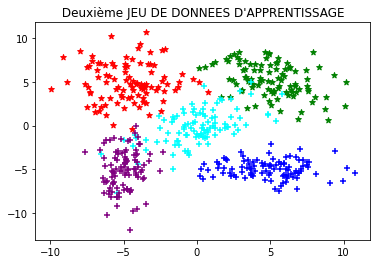

In [32]:
# Importation Données Apprentissage

dataTp2_App=pd.read_csv('data_tp2_app.txt',delimiter=' ',header=None)
dataTp2_App=dataTp2_App.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp2_App.loc[0:99]
class2=dataTp2_App.loc[100:199]
class3=dataTp2_App.loc[200:299]
class4=dataTp2_App.loc[300:399]
class5=dataTp2_App.loc[400:499]

#fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)

plt.title(" Deuxième JEU DE DONNEES D'APPRENTISSAGE ")


A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+',label='classe3')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*',label='classe4')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+',label='classe5')]


### Affichons maintenant les hyperplans comme frontière de décision de classes deux à deux.

  ***** Deuxième JEU DE DONNEES ***** 


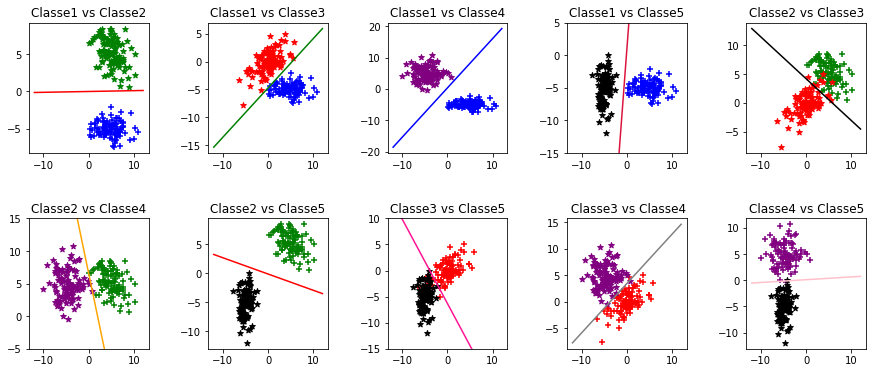

In [33]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

print("  ***** Deuxième JEU DE DONNEES ***** ")

plt.subplot(2,5,1)
plt.title("Classe1 vs Classe2")
d1=perceptron_Adapte(class1,class2)
x1= np.linspace(-12,12,2)
y1= (-d1[2] - (d1[0])*x1)/d1[1]
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class2[1],class2[2], c = 'green', marker = '*')
plt.plot(x1, y1, '-r',label='c1VSc2')
#
#
plt.subplot(2,5,2)
plt.title("Classe1 vs Classe3")
d2=perceptron_Adapte(class1,class3)
x2= np.linspace(-12,12,2)
y2= (-d2[2] - (d2[0])*x2)/d2[1]
plt.plot(x2, y2, '-g',label='c1VSc3')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class3[1],class3[2], c = 'red', marker = '*')
#
plt.subplot(2,5,3)
plt.title("Classe1 vs Classe4")
d3=perceptron_Adapte(class1,class4) 
x3= np.linspace(-12,12,2)
y3= (-d3[2] - (d3[0])*x3)/d3[1]
plt.plot(x3, y3, '-b',label='c1VSc4')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
#
plt.subplot(2,5,4)
plt.title("Classe1 vs Classe5")
d4=perceptron_Adapte(class1,class5) 
x4= np.linspace(-12,12,2)
y4= (-d4[2] - (d4[0])*x4)/d4[1]
plt.plot(x4, y4, 'crimson',label='c1VSc5')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.ylim(-15,5)
#
plt.subplot(2,5,5)
plt.title("Classe2 vs Classe3")
d5=perceptron_Adapte(class2,class3) 
x5= np.linspace(-12,12,2)
y5= (-d5[2] - (d5[0])*x5)/d5[1]
plt.plot(x5, y5, '-k',label='c2VSc3')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class3[1],class3[2], c = 'red', marker = '*')
#
plt.subplot(2,5,6)
plt.title("Classe2 vs Classe4")
d6=perceptron_Adapte(class2,class4) 
x6= np.linspace(-12,12,2)
y6= (-d6[2] - (d6[0])*x6)/d6[1]
plt.plot(x6, y6, 'orange',label='c2VSc4')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
plt.ylim(-5,15)
#
plt.subplot(2,5,7)
plt.title("Classe2 vs Classe5")
d7=perceptron_Adapte(class2,class5)
x7= np.linspace(-12,12,2)
y7= (-d7[2] - (d7[0])*x7)/d7[1]
plt.plot(x7, y7, '-r',label='c2VSc5')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
#
plt.subplot(2,5,8)
plt.title("Classe3 vs Classe5")
d8=perceptron_Adapte(class3,class5) 
x8= np.linspace(-12,12,2)
y8= (-d8[2] - (d8[0])*x8)/d8[1]
plt.plot(x8, y8, 'deeppink',label='c3VSc5')
plt.scatter(class3[1],class3[2], c = 'red', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.ylim(-15,10)
#
plt.subplot(2,5,9)
plt.title(" Classe3 vs Classe4")
d9=perceptron_Adapte(class3,class4)
x9= np.linspace(-12,12,2)
y9= (-d9[2] - (d9[0])*x9)/d9[1]
plt.plot(x9, y9, 'grey',label='c3VSc4')
plt.scatter(class3[1],class3[2], c = 'red', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
#
plt.subplot(2,5,10)
plt.title("Classe4 vs Classe5")
d10=perceptron_Adapte(class4,class5)
x10= np.linspace(-12,12,2)
y10= (-d10[2] - (d10[0])*x10)/d10[1]
plt.plot(x10, y10, 'pink',label='c4VSc5')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.show()

### EVALUATION DES PERFORMANCES

L'évaluation des performances ici consiste à calculer la matrice de confusion ainsi les différents taux de bonne classification.

Afin d'évaluer les performances, nous avons créé une fonction de nommée prédiction dont le rôle est de renvoyer les labels pour les données de test afin d'en élaborer la matrice de confusion puis en déduire le taux de bonne classification. 

In [35]:
def prediction(classe1,classe2):
    d= np.concatenate((classe1,classe2))
    g=perceptron_Adapte(classe1,classe2) 
    pr1= [];pr2= [] #0
    l1=d.T[0];l2=d.T[1];n=l1.shape[0]
#
    for i in range(n):
        droite= g[0]*l1[i] + g[1]*l2[i] + g[2]
        if droite > 0:
            pr1.append(1)      #= pr1 +1
        else:
            pr2.append(2)      #= pr2+1
    liste=pr1+pr2
    return liste
#
print(prediction(class2,class3))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### a) Matrice de Confusion de classes deux à deux

#### Importer les données de test.

In [37]:
data2=pd.read_csv('data_tp2_dec.txt',delimiter=' ',header=None)
h=data2.iloc[:,0]
tuple1=list(h)
#
clas1=tuple1[0:100]
clas2=tuple1[100:200]
clas3=tuple1[200:300]
clas4=tuple1[300:400]
clas5=tuple1[400:500]
len(clas5)

def make_list(clas1,clas2):
    list_Class=[]
    list_Class=clas1+clas2
    return list_Class

#len(make_list(clas4,clas3))

  ***** Matrice de Confusion de classes deux à deux ***** 


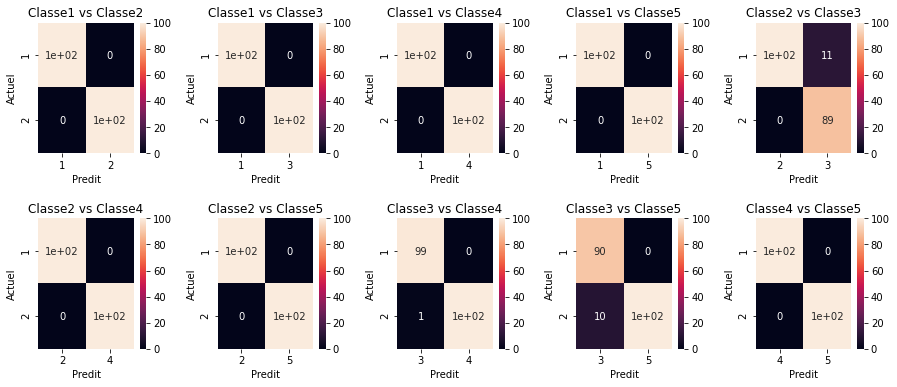

In [38]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

print("  ***** Matrice de Confusion de classes deux à deux ***** ")

plt.subplot(2,5,1)
plt.title("Classe1 vs Classe2")
df = pd.DataFrame({'y_Actual' : prediction(class1,class2),
        'y_Predicted' : make_list(clas1,clas2)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,2)
plt.title("Classe1 vs Classe3")
df = pd.DataFrame({'y_Actual' : prediction(class1,class3),
        'y_Predicted' : make_list(clas1,clas3)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,3)
plt.title("Classe1 vs Classe4")
df = pd.DataFrame({'y_Actual' : prediction(class1,class4),
        'y_Predicted' : make_list(clas1,clas4)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,4)
plt.title("Classe1 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class1,class5),
        'y_Predicted' : make_list(clas1,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,5)
plt.title("Classe2 vs Classe3")
df = pd.DataFrame({'y_Actual' : prediction(class2,class3),
        'y_Predicted' : make_list(clas2,clas3)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,6)
plt.title("Classe2 vs Classe4")
df = pd.DataFrame({'y_Actual' : prediction(class2,class4),
        'y_Predicted' : make_list(clas2,clas4)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,7)
plt.title("Classe2 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class2,class5),
        'y_Predicted' : make_list(clas2,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,8)
plt.title("Classe3 vs Classe4")
df = pd.DataFrame({'y_Actual' : prediction(class3,class4),
        'y_Predicted' : make_list(clas3,clas4)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,9)
plt.title("Classe3 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class3,class5),
        'y_Predicted' : make_list(clas3,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,10)
plt.title("Classe4 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class4,class5),
        'y_Predicted' : make_list(clas4,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.show()

### b) Taux de bonne classification

In [40]:
def tauxBonneClassification(ConfMatrice):
    n=len(ConfMatrice)
    sommeDiag=0
    for i in range(n):
        for j in range(n):
            if i==j:
                sommeDiag +=ConfMatrice[i,j]
    taux=sommeDiag/ConfMatrice.shape[0]
    return taux

#Appel à la fonction
data_app=prediction(class1,class3)
data_test= make_list(clas1,clas3) #liste de données de Test
ConfMatrice=confusion_matrix([1 if x==1 else 3 for x in prediction(class1,class3)],[1 if x==1 else 3 for x in make_list(clas1,clas3)])
#

In [41]:
def tauxBonneClassification2(ConfMatrice):
    n=len(ConfMatrice)
    sommeDiag=0
    for i in range(n):
        for j in range(n):
            if i==j:
                sommeDiag +=ConfMatrice[i,j]
    taux=100-sommeDiag/ConfMatrice.shape[0]
    return taux

In [42]:
ConfMatrice=confusion_matrix(prediction(class1,class2),make_list(clas1,clas2))
print("Le taux de bonne classification Classe1 vs Classe2 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==1 else 3 for x in prediction(class1,class3)],[1 if x==1 else 3 for x in make_list(clas1,clas3)])
print("Le taux de bonne classification Classe1 vs Classe3 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==1 else 4 for x in prediction(class1,class4)],[1 if x==1 else 4 for x in make_list(clas1,clas4)])
print("Le taux de bonne classification Classe1 vs Classe4 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==1 else 5 for x in prediction(class1,class5)],[1 if x==1 else 5 for x in make_list(clas1,clas5)])
print("Le taux de bonne classification Classe1 vs Classe5 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==2 else 2 for x in prediction(class2,class3)],[1 if x==2 else 2 for x in make_list(clas2,clas3)])
print("Le taux de bonne classification Classe2 vs Classe3 est : {} %".format(tauxBonneClassification2(ConfMatrice)))
print()
ConfMatrice=confusion_matrix(prediction(class2,class4),make_list(clas2,clas4))
print("Le taux de bonne classification Classe2 vs Classe4 est : {} %".format(tauxBonneClassification2(ConfMatrice)))
print()
ConfMatrice=confusion_matrix(prediction(class2,class5),make_list(clas2,clas5))
print("Le taux de bonne classification Classe2 vs Classe5 est : {} %".format(tauxBonneClassification2(ConfMatrice)))
print()
ConfMatrice=confusion_matrix(prediction(class3,class4),make_list(clas3,clas4))
print("Le taux de bonne classification Classe3 vs Classe4 est : {} %".format(tauxBonneClassification(ConfMatrice[0:2,2:4])))
print()
ConfMatrice=confusion_matrix(prediction(class3,class5),make_list(clas3,clas5))
print("Le taux de bonne classification Classe3 vs Classe5 est : {} %".format(tauxBonneClassification(ConfMatrice[0:2,2:4])))
print()
ConfMatrice=confusion_matrix(prediction(class4,class5),make_list(clas4,clas5))
print("Le taux de bonne classification Classe4 vs Classe5 est : {} %".format(tauxBonneClassification2(ConfMatrice)))
print()

Le taux de bonne classification Classe1 vs Classe2 est : 100.0 %

Le taux de bonne classification Classe1 vs Classe3 est : 100.0 %

Le taux de bonne classification Classe1 vs Classe4 est : 100.0 %

Le taux de bonne classification Classe1 vs Classe5 est : 100.0 %

Le taux de bonne classification Classe2 vs Classe3 est : 94.5 %

Le taux de bonne classification Classe2 vs Classe4 est : 100.0 %

Le taux de bonne classification Classe2 vs Classe5 est : 100.0 %

Le taux de bonne classification Classe3 vs Classe4 est : 99.5 %

Le taux de bonne classification Classe3 vs Classe5 est : 95.0 %

Le taux de bonne classification Classe4 vs Classe5 est : 100.0 %



### Taux de bonne classification en moyenne

In [45]:
Taux_moyen_BonneClassification=(700+94.5+99.5+95.5)/10
#
print("Taux moyen de Bonne Classification: {}".format(Taux_moyen_BonneClassification))

Taux moyen de Bonne Classification: 98.95


## COMMENTAIRES

Pour ce jeu de données(non linéairement séparables), En utilisant le jeu de données de test,les pourcentages se sont améliorés dans l'ordre de 90 pourcents voire 100 pourcents grâce à la fonction adaptée qui renvoie le meilleur hyperplan.

Nous avons donc sû trouver le meilleur hyperplan qui sépare au mieux les différentes classes les unes des autres.

### 2. TEST SUR LE JEU DE DONNEES TP3

In [48]:
dataTp3_App=pd.read_csv('data_tp3_app.txt',delimiter=' ',header=None)
dataTp3_App=dataTp3_App.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp3_App.loc[0:99]
class2=dataTp3_App.loc[100:199]
class3=dataTp3_App.loc[200:299]
class4=dataTp3_App.loc[300:399]
class5=dataTp3_App.loc[400:499]



### Affichons tout d'abord les données pour en connaitre la forme de la distribution.

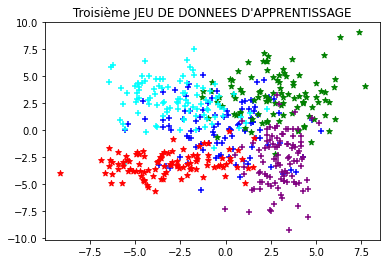

In [51]:
#fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)

plt.title(" Troisième JEU DE DONNEES D'APPRENTISSAGE ")


A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+',label='classe3')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*',label='classe4')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+',label='classe5')]


  ***** Troisième JEU DE DONNEES ***** 


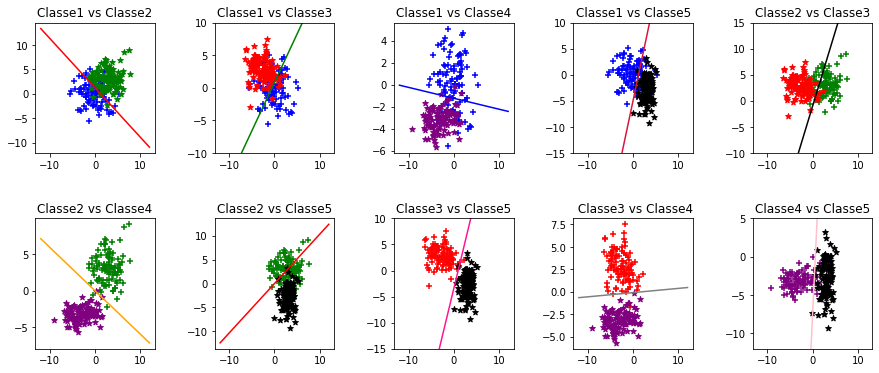

In [52]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

print("  ***** Troisième JEU DE DONNEES ***** ")

plt.subplot(2,5,1)
plt.title("Classe1 vs Classe2")
d1=perceptron_Adapte(class1,class2)
x1= np.linspace(-12,12,2)
y1= (-d1[2] - (d1[0])*x1)/d1[1]
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class2[1],class2[2], c = 'green', marker = '*')
plt.plot(x1, y1, '-r',label='c1VSc2')
#
#
plt.subplot(2,5,2)
plt.title("Classe1 vs Classe3")
d2=perceptron_Adapte(class1,class3)
x2= np.linspace(-12,12,2)
y2= (-d2[2] - (d2[0])*x2)/d2[1]
plt.plot(x2, y2, '-g',label='c1VSc3')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class3[1],class3[2], c = 'red', marker = '*')
plt.ylim(-10,10)
#
plt.subplot(2,5,3)
plt.title("Classe1 vs Classe4")
d3=perceptron_Adapte(class1,class4) 
x3= np.linspace(-12,12,2)
y3= (-d3[2] - (d3[0])*x3)/d3[1]
plt.plot(x3, y3, '-b',label='c1VSc4')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
#
plt.subplot(2,5,4)
plt.title("Classe1 vs Classe5")
d4=perceptron_Adapte(class1,class5) 
x4= np.linspace(-12,12,2)
y4= (-d4[2] - (d4[0])*x4)/d4[1]
plt.plot(x4, y4, 'crimson',label='c1VSc5')
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.ylim(-15,10)
#
plt.subplot(2,5,5)
plt.title("Classe2 vs Classe3")
d5=perceptron_Adapte(class2,class3) 
x5= np.linspace(-12,12,2)
y5= (-d5[2] - (d5[0])*x5)/d5[1]
plt.plot(x5, y5, '-k',label='c2VSc3')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class3[1],class3[2], c = 'red', marker = '*')
plt.ylim(-10,15)
#
plt.subplot(2,5,6)
plt.title("Classe2 vs Classe4")
d6=perceptron_Adapte(class2,class4) 
x6= np.linspace(-12,12,2)
y6= (-d6[2] - (d6[0])*x6)/d6[1]
plt.plot(x6, y6, 'orange',label='c2VSc4')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
#
plt.subplot(2,5,7)
plt.title("Classe2 vs Classe5")
d7=perceptron_Adapte(class2,class5)
x7= np.linspace(-12,12,2)
y7= (-d7[2] - (d7[0])*x7)/d7[1]
plt.plot(x7, y7, '-r',label='c2VSc5')
plt.scatter(class2[1],class2[2], c = 'green', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
#
plt.subplot(2,5,8)
plt.title("Classe3 vs Classe5")
d8=perceptron_Adapte(class3,class5) 
x8= np.linspace(-12,12,2)
y8= (-d8[2] - (d8[0])*x8)/d8[1]
plt.plot(x8, y8, 'deeppink',label='c3VSc5')
plt.scatter(class3[1],class3[2], c = 'red', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.ylim(-15,10)
#
plt.subplot(2,5,9)
plt.title(" Classe3 vs Classe4")
d9=perceptron_Adapte(class3,class4)
x9= np.linspace(-12,12,2)
y9= (-d9[2] - (d9[0])*x9)/d9[1]
plt.plot(x9, y9, 'grey',label='c3VSc4')
plt.scatter(class3[1],class3[2], c = 'red', marker = '+')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '*')
#
plt.subplot(2,5,10)
plt.title("Classe4 vs Classe5")
d10=perceptron_Adapte(class4,class5)
x10= np.linspace(-12,12,2)
y10= (-d10[2] - (d10[0])*x10)/d10[1]
plt.plot(x10, y10, 'pink',label='c4VSc5')
plt.scatter(class4[1],class4[2], c = 'purple', marker = '+')
plt.scatter(class5[1],class5[2], c = 'black', marker = '*')
plt.ylim(-12,5)
plt.show()

### EVALUATION DES PERFORMANCES

### a) Matrice de Confusion de classes deux à deux

### Importer les données de test.

In [55]:
data2=pd.read_csv('data_tp3_dec.txt',delimiter=' ',header=None)
h=data2.iloc[:,0]
tuple1=list(h)
#
clas1=tuple1[0:100]
clas2=tuple1[100:200]
clas3=tuple1[200:300]
clas4=tuple1[300:400]
clas5=tuple1[400:500]

  ***** Matrice de Confusion de classes deux à deux ***** 


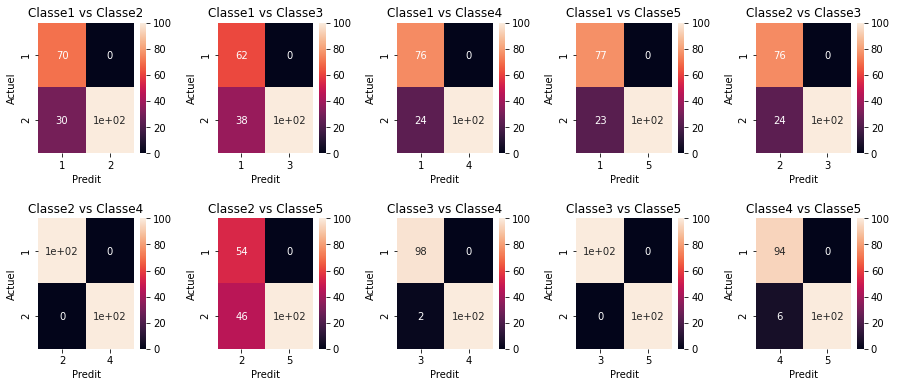

In [56]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

print("  ***** Matrice de Confusion de classes deux à deux ***** ")

plt.subplot(2,5,1)
plt.title("Classe1 vs Classe2")
df = pd.DataFrame({'y_Actual' : prediction(class1,class2),
        'y_Predicted' : make_list(clas1,clas2)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,2)
plt.title("Classe1 vs Classe3")
df = pd.DataFrame({'y_Actual' : prediction(class1,class3),
        'y_Predicted' : make_list(clas1,clas3)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,3)
plt.title("Classe1 vs Classe4")
df = pd.DataFrame({'y_Actual' : prediction(class1,class4),
        'y_Predicted' : make_list(clas1,clas4)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,4)
plt.title("Classe1 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class1,class5),
        'y_Predicted' : make_list(clas1,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,5)
plt.title("Classe2 vs Classe3")
df = pd.DataFrame({'y_Actual' : prediction(class2,class3),
        'y_Predicted' : make_list(clas2,clas3)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,6)
plt.title("Classe2 vs Classe4")
df = pd.DataFrame({'y_Actual' : prediction(class2,class4),
        'y_Predicted' : make_list(clas2,clas4)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,7)
plt.title("Classe2 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class2,class5),
        'y_Predicted' : make_list(clas2,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,8)
plt.title("Classe3 vs Classe4")
df = pd.DataFrame({'y_Actual' : prediction(class3,class4),
        'y_Predicted' : make_list(clas3,clas4)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,9)
plt.title("Classe3 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class3,class5),
        'y_Predicted' : make_list(clas3,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.subplot(2,5,10)
plt.title("Classe4 vs Classe5")
df = pd.DataFrame({'y_Actual' : prediction(class4,class5),
        'y_Predicted' : make_list(clas4,clas5)
        }, columns=['y_Actual','y_Predicted'])

sn.heatmap(pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actuel'], colnames=['Predit']), annot=True)
#
plt.show()

### b) Taux de bonne classification

In [61]:
ConfMatrice=confusion_matrix(prediction(class1,class2),make_list(clas1,clas2))
print("Le taux de bonne classification Classe1 vs Classe2 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==1 else 3 for x in prediction(class1,class3)],[1 if x==1 else 3 for x in make_list(clas1,clas3)])
print("Le taux de bonne classification Classe1 vs Classe3 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==1 else 4 for x in prediction(class1,class4)],[1 if x==1 else 4 for x in make_list(clas1,clas4)])
print("Le taux de bonne classification Classe1 vs Classe4 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==1 else 5 for x in prediction(class1,class5)],[1 if x==1 else 5 for x in make_list(clas1,clas5)])
print("Le taux de bonne classification Classe1 vs Classe5 est : {} %".format(tauxBonneClassification(ConfMatrice)))
print()
ConfMatrice=confusion_matrix([1 if x==2 else 2 for x in prediction(class2,class3)],[1 if x==2 else 2 for x in make_list(clas2,clas3)])
print("Le taux de bonne classification Classe2 vs Classe3 est : {} %".format(tauxBonneClassification2(ConfMatrice)))
print()
ConfMatrice=confusion_matrix(prediction(class2,class4),make_list(clas2,clas4))
print("Le taux de bonne classification Classe2 vs Classe4 est : {} %".format(tauxBonneClassification2(ConfMatrice)))
print()
ConfMatrice=confusion_matrix(prediction(class2,class5),make_list(clas2,clas5))
print("Le taux de bonne classification Classe2 vs Classe5 est : {} %".format(tauxBonneClassification(ConfMatrice[0:2,1:3])))
print()
ConfMatrice=confusion_matrix(prediction(class3,class4),make_list(clas3,clas4))
print("Le taux de bonne classification Classe3 vs Classe4 est : {} %".format(tauxBonneClassification(ConfMatrice[0:2,2:4])))
print()
ConfMatrice=confusion_matrix(prediction(class3,class5),make_list(clas3,clas5))
print("Le taux de bonne classification Classe3 vs Classe5 est : {} %".format(tauxBonneClassification(ConfMatrice[0:2,2:4])))
print()
ConfMatrice=confusion_matrix(prediction(class4,class5),make_list(clas4,clas5))
print("Le taux de bonne classification Classe4 vs Classe5 est : {} %".format(tauxBonneClassification(ConfMatrice[0:2,2:4])))
print()

Le taux de bonne classification Classe1 vs Classe2 est : 85.0 %

Le taux de bonne classification Classe1 vs Classe3 est : 81.0 %

Le taux de bonne classification Classe1 vs Classe4 est : 88.0 %

Le taux de bonne classification Classe1 vs Classe5 est : 88.5 %

Le taux de bonne classification Classe2 vs Classe3 est : 88.0 %

Le taux de bonne classification Classe2 vs Classe4 est : 100.0 %

Le taux de bonne classification Classe2 vs Classe5 est : 77.0 %

Le taux de bonne classification Classe3 vs Classe4 est : 99.0 %

Le taux de bonne classification Classe3 vs Classe5 est : 100.0 %

Le taux de bonne classification Classe4 vs Classe5 est : 97.0 %



### Taux de bonne classification en moyenne

In [63]:
Taux_moyen_BonneClassification=(85+81+88+88.5+88+100+77+99+100+97)/10
#
print("Taux moyen de Bonne Classification: {}".format(Taux_moyen_BonneClassification))

Taux moyen de Bonne Classification: 90.35


### COMMENTAIRES

En observant la distribution des données affichées ci-haut, nous remarquons qu'elles sont beaucoup plus bruitées que celles du deuxième jeu de données. Il est donc nettement plus difficile de trouver une droite qui les séparent au mieux.

Cependant, l'hyperplan trouvé est meilleur parce qu'il commet le minimum d'erreur possible.

# III. One vs All

In [68]:
def transformation_OneVsAll(cl1,cl2):
    x1=cl1.shape[0]
    x2=cl2.shape[0]
    y1=cl1.shape[1]
    y2=cl2.shape[1]
    
    un=np.ones((x1,1))
    moins_un=np.ones((x2,1))
    
    cl1n = np.hstack((cl1,un))
    cl2n = -np.hstack((cl2,moins_un))
    concat= np.concatenate((cl1n,cl2n))
    return concat
#
#cl2=class2=dataTp1_App.loc[100:499]
#transformation_OneVsAll(class1,cl2)

### 1.TEST SUR LE JEU DE DONNEES TP1

In [75]:
#Importation Données Apprentissage

dataTp1_App=pd.read_csv('data_tp1_app.txt',delimiter=' ',header=None)
dataTp1_App=dataTp1_App.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp1_App.loc[0:99]
class2=dataTp1_App.loc[100:199]
class3=dataTp1_App.loc[200:299]
class4=dataTp1_App.loc[300:399]
class5=dataTp1_App.loc[400:499]


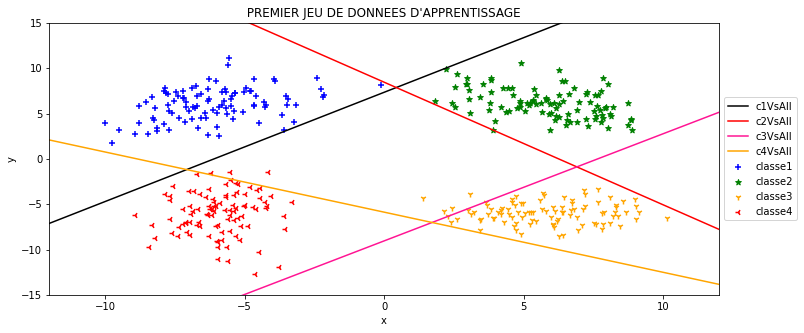

In [78]:
fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)

plt.title(" PREMIER JEU DE DONNEES D'APPRENTISSAGE ")


plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'orange', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')

#
cl2=dataTp1_App.loc[100:499]
d11=perceptron(transformation_OneVsAll(class1,cl2))  
x11= np.linspace(-12,12,2)
y11= (-d11[2] - (d11[0])*x11)/d11[1]
plt.plot(x11, y11, '-k',label='c1VsAll')
#
cl2=np.concatenate((class1,dataTp1_App.loc[200:499]))
d12=perceptron(transformation_OneVsAll(class2,cl2))  
x12= np.linspace(-12,12,2)
y12= (-d12[2] - (d12[0])*x12)/d12[1]
plt.plot(x12, y12, '-r',label='c2VsAll')
#
cl2=np.concatenate((class4,dataTp1_App.loc[0:199]))
d12=perceptron(transformation_OneVsAll(class3,cl2))  
x12= np.linspace(-12,12,2)
y12= (-d12[2] - (d12[0])*x12)/d12[1]
plt.plot(x12, y12, 'deeppink',label='c3VsAll')
#
cl2=dataTp1_App.loc[0:299]
d14=perceptron(transformation_OneVsAll(class4,cl2))  
x14= np.linspace(-12,12,2)
y14= (-d14[2] - (d14[0])*x14)/d14[1]
plt.plot(x14, y14, 'orange',label='c4VsAll')

#
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#
plt.xlabel('x')
plt.ylabel('y')
#
plt.xlim((-12,12))
plt.ylim(-15,15)
#
#plt.legend()
plt.show()

### EVALUATION DES PERFORMANCES

### a) Matrice de Confusion

In [79]:
def prediction2(classe1,classe2):
    d= np.concatenate((classe1,classe2))
    g=perceptron(transformation_OneVsAll(classe1,classe2))
    pr1= [];pr2= [] #0
    l1=d.T[0];l2=d.T[1];n=l1.shape[0]
#
    for i in range(n):
        droite= g[0]*l1[i] + g[1]*l2[i] + g[2]
        if droite > 0:
            pr1.append(1)      #= pr1 +1
        else:
            pr2.append(2)      #= pr2+1
    liste=pr1+pr2
    return liste
#

In [80]:
data2=pd.read_csv('data_tp1_dec.txt',delimiter=' ',header=None)
h=data2.iloc[:,0]
tuple1=list(h)
#
clas1=tuple1[0:100]
clas2=tuple1[100:200]
clas3=tuple1[200:300]
clas4=tuple1[300:400]
clas5=tuple1[400:500]
len(clas5)

def make_list2(clas1,clas2,clas3):
    list_Class=[]
    list_Class=clas1+clas2+clas3
    return list_Class

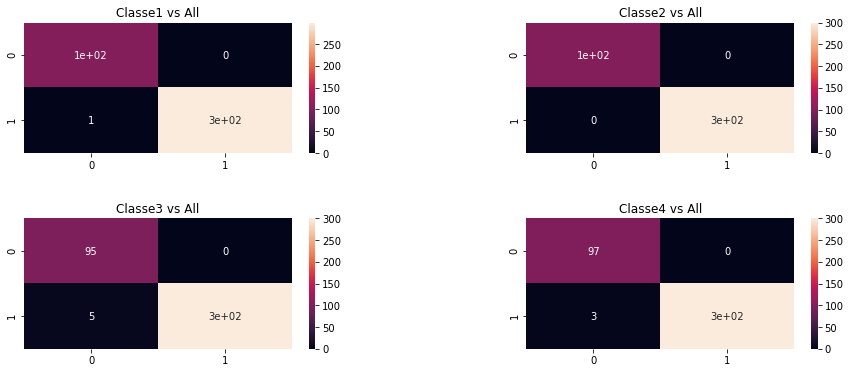

In [81]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.title(" Matrice de confusion")
#
plt.subplot(2,2,1)
plt.title("Classe1 vs All")
data_app=prediction2(class1,dataTp1_App.loc[100:399])
data_test= [1 if x==1 else 2 for x in make_list(clas1,tuple1[99:399])]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,2)
plt.title("Classe2 vs All")
data_app=prediction2(class2,np.concatenate((class1,dataTp1_App.loc[200:399])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,3)
plt.title("Classe3 vs All")
data_app=prediction2(class3,np.concatenate((class4,dataTp1_App.loc[0:199])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,4)
plt.title("Classe4 vs All")
data_app=prediction2(class4,dataTp1_App.loc[0:299])
data_test= [1 if x==1 else 2 for x in make_list(tuple1[0:300],clas4)]          
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)      
plt.show()

### b) Taux de bonne classification

In [83]:
def tauxBonneClassification3(ConfMatrice):
    n=len(ConfMatrice)
    sommeDiag=0
    for i in range(n):
        for j in range(n):
            if i==j:
                sommeDiag +=ConfMatrice[i,j]
    taux=sommeDiag/4
    return taux

In [84]:
data_app=prediction2(class1,dataTp1_App.loc[100:399])
data_test= [1 if x==1 else 2 for x in make_list(clas1,tuple1[99:399])]  
print("Le taux de bonne classification Classe1 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
ata_app=prediction2(class2,np.concatenate((class1,dataTp1_App.loc[200:399])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]  
print("Le taux de bonne classification Classe2 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
data_app=prediction2(class3,np.concatenate((class4,dataTp1_App.loc[0:199])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]] 
print("Le taux de bonne classification Classe3 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
data_app=prediction2(class4,dataTp1_App.loc[0:299])
data_test= [1 if x==1 else 2 for x in make_list(tuple1[0:300],clas4)] 
print("Le taux de bonne classification Classe4 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()

Le taux de bonne classification Classe1 vs All est : 99.75 %

Le taux de bonne classification Classe2 vs All est : 100.0 %

Le taux de bonne classification Classe3 vs All est : 98.75 %

Le taux de bonne classification Classe4 vs All est : 99.25 %



### Moyenne Taux de bonne classification

In [85]:
Taux_moyen_BonneClassification=(99.75+100+98.75+99.25)/4
#
print("Taux moyen de Bonne Classification: {}".format(Taux_moyen_BonneClassification))

Taux moyen de Bonne Classification: 99.4375


### COMMENTAIRES

Bien que ce jeu de données soit linéairement séparable, le taux de bonne classification n'est pas de 100 pourcents pour la stratégie One vs All.

L'algorithme cherche non pas à séparer une classe d'une autre mais plustôt une classe de toutes les autres. C'est ce qui conduit à ce taux d'ereurs de 99.4 en moyenne.

### 2.TEST SUR LE JEU DE DONNEES TP2

Adaptons à nouveau cette fonction afin d'en renvoyer le meilleur hyperplan.

In [90]:
def perceptron_Adapte2(classe1,classe2):
    donnee = transformation_OneVsAll(classe1,classe2)
    vector = np.zeros(3)
    n = 1000
    memo=[]
    monTab1=[]
    monTab2=[]
    listSom=[]
    for i in range(n):
        tamp = vector
        for j in range(len(donnee)):
            tab=vector.T@donnee[j]
            if tab <= 0:
                vector = vector + donnee[j]   
        memo.append(vector)
        monTab1.append(erreur(classe1,classe2,memo[i]))    
    indice=np.argmin(monTab1)
    true_vector=memo[indice]
    return true_vector
#
perceptron_Adapte2(class2,class4) 

array([3.043789, 6.633307, 1.      ])

In [91]:
 #Importation Données Apprentissage

dataTp1_App=pd.read_csv('data_tp2_app.txt',delimiter=' ',header=None)
dataTp1_App=dataTp1_App.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp1_App.loc[0:99]
class2=dataTp1_App.loc[100:199]
class3=dataTp1_App.loc[200:299]
class4=dataTp1_App.loc[300:399]
class5=dataTp1_App.loc[400:499]


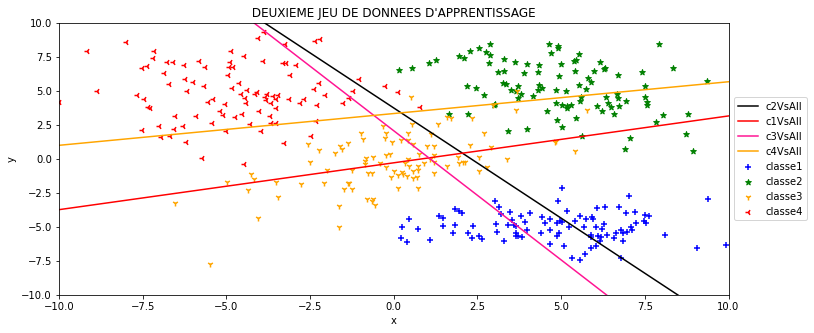

In [92]:
fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)

plt.title(" DEUXIEME JEU DE DONNEES D'APPRENTISSAGE ")


plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'orange', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')

#
cl2=dataTp1_App.loc[100:499]
#d11=perceptron(transformation_OneVsAll(class1,cl2)) 
d11=perceptron_Adapte2(class1,cl2) 
x11= np.linspace(-12,12,2)
y11= (-d11[2] - (d11[0])*x11)/d11[1]
plt.plot(x11, y11, '-k',label='c2VsAll')
#
cl2=np.concatenate((class1,dataTp1_App.loc[200:399]))
#d12=perceptron(transformation_OneVsAll(class2,cl2))
d12=perceptron_Adapte2(class2,cl2) 
x12= np.linspace(-12,12,2)
y12= (-d12[2] - (d12[0])*x12)/d12[1]
plt.plot(x12, y12, '-r',label='c1VsAll')
#
cl2=np.concatenate((class4,dataTp1_App.loc[0:199]))
#d12=perceptron(transformation_OneVsAll(class3,cl2)) 
d13=perceptron_Adapte2(class3,cl2) 
x13= np.linspace(-12,12,2)
y13= (-d13[2] - (d13[0])*x13)/d13[1]
plt.plot(x13, y13, 'deeppink',label='c3VsAll')
#
cl2=dataTp1_App.loc[0:299]
#d14=perceptron(transformation_OneVsAll(class4,cl2))
d14=perceptron_Adapte2(class4,cl2) 
x14= np.linspace(-12,12,2)
y14= (-d14[2] - (d14[0])*x14)/d14[1]
plt.plot(x14, y14, 'orange',label='c4VsAll')

#
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#
plt.xlabel('x')
plt.ylabel('y')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
#plt.legend()
plt.show()

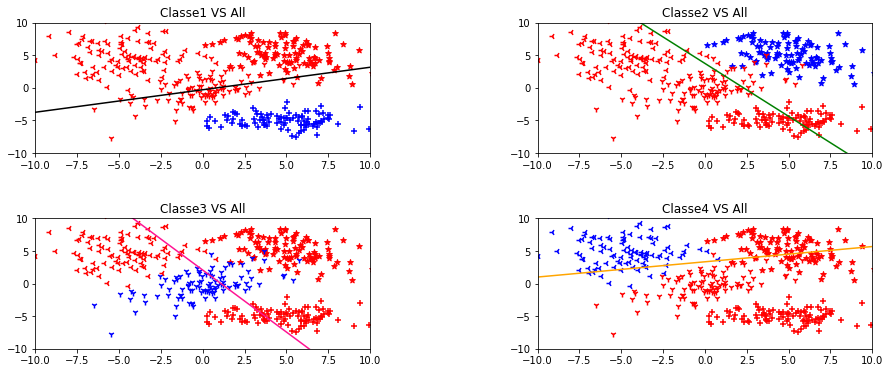

In [97]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.title(" DEUXIEME JEU DE DONNEES D'APPRENTISSAGE ")
#
plt.subplot(2,2,1)
plt.title("Classe1 VS All")
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'red', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'red', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')
cl2=dataTp1_App.loc[100:499]
#d11=perceptron(transformation_OneVsAll(class1,cl2)) 
d11=perceptron_Adapte2(class1,cl2) 
x11= np.linspace(-12,12,2)
y11= (-d11[2] - (d11[0])*x11)/d11[1]
plt.plot(x12, y12, '-k',label='c1VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.subplot(2,2,2)
plt.title("Classe2 VS All")
plt.scatter(class1[1],class1[2], c = 'red', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'blue', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'red', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')
cl2=np.concatenate((class1,dataTp1_App.loc[200:399]))
#d12=perceptron(transformation_OneVsAll(class2,cl2))
d12=perceptron_Adapte2(class2,cl2) 
x12= np.linspace(-12,12,2)
y12= (-d12[2] - (d12[0])*x12)/d12[1]
plt.plot(x11, y11, 'green',label='c2VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.subplot(2,2,3)
plt.title("Classe3 VS All")
plt.scatter(class1[1],class1[2], c = 'red', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'red', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'blue', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')
cl2=np.concatenate((class4,dataTp1_App.loc[0:199]))
#d12=perceptron(transformation_OneVsAll(class3,cl2)) 
d13=perceptron_Adapte2(class3,cl2) 
x13= np.linspace(-12,12,2)
y13= (-d13[2] - (d13[0])*x13)/d13[1]
plt.plot(x13, y13, 'deeppink',label='c3VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.subplot(2,2,4)
plt.title("Classe4 VS All")
plt.scatter(class1[1],class1[2], c = 'red', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'red', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'red', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'blue', marker = '3',label='classe4')
cl2=dataTp1_App.loc[0:299]
#d14=perceptron(transformation_OneVsAll(class4,cl2))
d14=perceptron_Adapte2(class4,cl2) 
x14= np.linspace(-12,12,2)
y14= (-d14[2] - (d14[0])*x14)/d14[1]
plt.plot(x14, y14, 'orange',label='c4VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.show()

### EVALUATION DES PERFORMANCES

### a) Matrice de Confusion

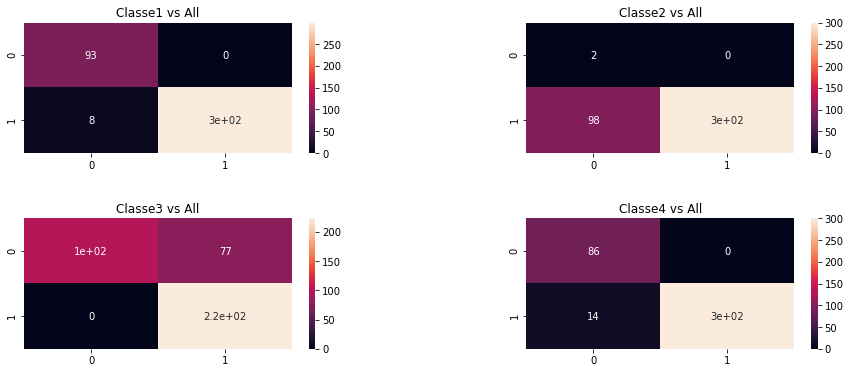

In [99]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.title(" Matrice de confusion")
#
plt.subplot(2,2,1)
plt.title("Classe1 vs All")
data_app=prediction2(class1,dataTp1_App.loc[100:399])
data_test= [1 if x==1 else 2 for x in make_list(clas1,tuple1[99:399])]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,2)
plt.title("Classe2 vs All")
data_app=prediction2(class2,np.concatenate((class1,dataTp1_App.loc[200:399])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,3)
plt.title("Classe3 vs All")
data_app=prediction2(class3,np.concatenate((class4,dataTp1_App.loc[0:199])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,4)
plt.title("Classe4 vs All")
data_app=prediction2(class4,dataTp1_App.loc[0:299])
data_test= [1 if x==1 else 2 for x in make_list(tuple1[0:300],clas4)]          
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)      
plt.show()

### b) Taux de bonne classification

In [102]:
data_app=prediction2(class1,dataTp1_App.loc[100:399])
data_test= [1 if x==1 else 2 for x in make_list(clas1,tuple1[99:399])]  
print("Le taux de bonne classification Classe1 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
ata_app=prediction2(class2,np.concatenate((class1,dataTp1_App.loc[200:399])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]  
print("Le taux de bonne classification Classe2 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
data_app=prediction2(class3,np.concatenate((class4,dataTp1_App.loc[0:199])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]] 
print("Le taux de bonne classification Classe3 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
data_app=prediction2(class4,dataTp1_App.loc[0:299])
data_test= [1 if x==1 else 2 for x in make_list(tuple1[0:300],clas4)] 
print("Le taux de bonne classification Classe4 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()

Le taux de bonne classification Classe1 vs All est : 98.0 %

Le taux de bonne classification Classe2 vs All est : 98.25 %

Le taux de bonne classification Classe3 vs All est : 80.75 %

Le taux de bonne classification Classe4 vs All est : 96.5 %



### Moyenne Taux de bonne classification

In [104]:
Taux_moyen_BonneClassification=(98+98.25+80.75+96.5)/4
#
print("Taux moyen de Bonne Classification: {}".format(Taux_moyen_BonneClassification))

Taux moyen de Bonne Classification: 93.375


### COMMENTAIRES

En comparant le taux moyen de bonne classification pour le même jeu de données, nous remarquons que dans la strategie One vs One le taux est meilleur soit 98.95 pourcents en moyenne, face à 93.375 pourcents pour la stratégie One vs All  

### 3.TEST SUR LE JEU DE DONNEES TP3

In [106]:
#Importation Données Apprentissage

dataTp1_App=pd.read_csv('data_tp3_app.txt',delimiter=' ',header=None)
dataTp1_App=dataTp1_App.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp1_App.loc[0:99]
class2=dataTp1_App.loc[100:199]
class3=dataTp1_App.loc[200:299]
class4=dataTp1_App.loc[300:399]
class5=dataTp1_App.loc[400:499]


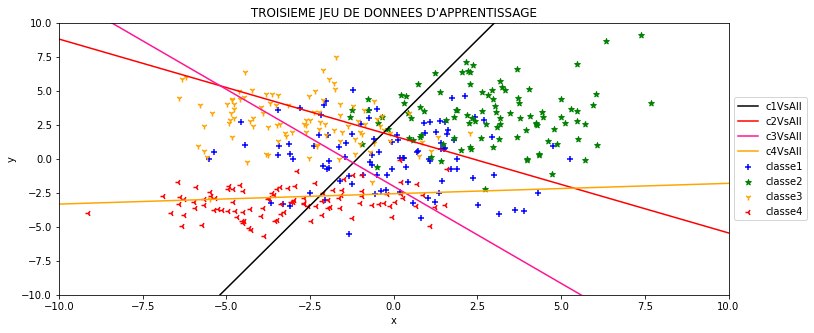

In [107]:
fig = plt.figure(1,figsize=(15,5))
ax = plt.subplot(111)


plt.title(" TROISIEME JEU DE DONNEES D'APPRENTISSAGE ")


plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'green', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'orange', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')

#
cl2=dataTp1_App.loc[100:499]
#d11=perceptron(transformation_OneVsAll(class1,cl2)) 
d11=perceptron_Adapte2(class1,cl2) 
x11= np.linspace(-12,12,2)
y11= (-d11[2] - (d11[0])*x11)/d11[1]
plt.plot(x11, y11, '-k',label='c1VsAll')
#
cl2=np.concatenate((class1,dataTp1_App.loc[200:399]))
#d12=perceptron(transformation_OneVsAll(class2,cl2))
d12=perceptron_Adapte2(class2,cl2) 
x12= np.linspace(-12,12,2)
y12= (-d12[2] - (d12[0])*x12)/d12[1]
plt.plot(x12, y12, '-r',label='c2VsAll')
#
cl2=np.concatenate((class4,dataTp1_App.loc[0:199]))
#d12=perceptron(transformation_OneVsAll(class3,cl2)) 
d13=perceptron_Adapte2(class3,cl2) 
x13= np.linspace(-12,12,2)
y13= (-d13[2] - (d13[0])*x13)/d13[1]
plt.plot(x13, y13, 'deeppink',label='c3VsAll')
#
cl2=dataTp1_App.loc[0:299]
#d14=perceptron(transformation_OneVsAll(class4,cl2))
d14=perceptron_Adapte2(class4,cl2) 
x14= np.linspace(-12,12,2)
y14= (-d14[2] - (d14[0])*x14)/d14[1]
plt.plot(x14, y14, 'orange',label='c4VsAll')

#
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#
plt.xlabel('x')
plt.ylabel('y')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
#plt.legend()
plt.show()

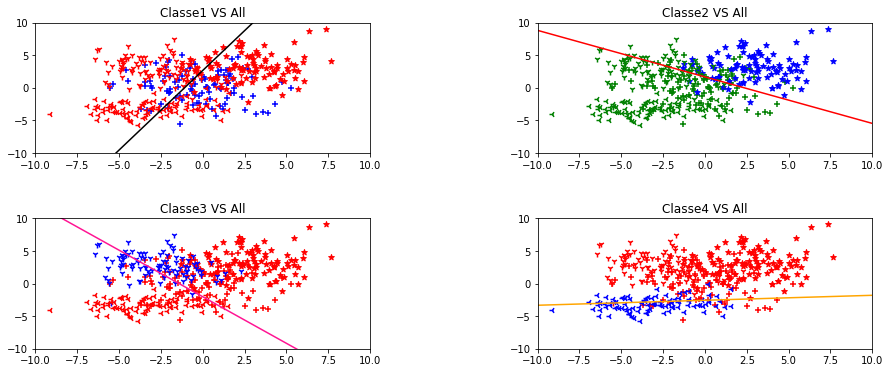

In [108]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.title(" TROISIEME JEU DE DONNEES D'APPRENTISSAGE ")
#
plt.subplot(2,2,1)
plt.title("Classe1 VS All")
plt.scatter(class1[1],class1[2], c = 'blue', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'red', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'red', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')
cl2=dataTp1_App.loc[100:499]
#d11=perceptron(transformation_OneVsAll(class1,cl2)) 
d11=perceptron_Adapte2(class1,cl2) 
x11= np.linspace(-12,12,2)
y11= (-d11[2] - (d11[0])*x11)/d11[1]
plt.plot(x11, y11, '-k',label='c1VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.subplot(2,2,2)
plt.title("Classe2 VS All")
plt.scatter(class1[1],class1[2], c = 'green', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'blue', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'green', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'green', marker = '3',label='classe4')
cl2=np.concatenate((class1,dataTp1_App.loc[200:399]))
#d12=perceptron(transformation_OneVsAll(class2,cl2))
d12=perceptron_Adapte2(class2,cl2) 
x12= np.linspace(-12,12,2)
y12= (-d12[2] - (d12[0])*x12)/d12[1]
plt.plot(x12, y12, '-r',label='c2VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.subplot(2,2,3)
plt.title("Classe3 VS All")
plt.scatter(class1[1],class1[2], c = 'red', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'red', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'blue', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'red', marker = '3',label='classe4')
cl2=np.concatenate((class4,dataTp1_App.loc[0:199]))
#d12=perceptron(transformation_OneVsAll(class3,cl2)) 
d13=perceptron_Adapte2(class3,cl2) 
x13= np.linspace(-12,12,2)
y13= (-d13[2] - (d13[0])*x13)/d13[1]
plt.plot(x13, y13, 'deeppink',label='c3VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.subplot(2,2,4)
plt.title("Classe4 VS All")
plt.scatter(class1[1],class1[2], c = 'red', marker = '+',label='classe1')
plt.scatter(class2[1],class2[2], c = 'red', marker = '*',label='classe2')
plt.scatter(class3[1],class3[2], c = 'red', marker = '1',label='classe3')
plt.scatter(class4[1],class4[2], c = 'blue', marker = '3',label='classe4')
cl2=dataTp1_App.loc[0:299]
#d14=perceptron(transformation_OneVsAll(class4,cl2))
d14=perceptron_Adapte2(class4,cl2) 
x14= np.linspace(-12,12,2)
y14= (-d14[2] - (d14[0])*x14)/d14[1]
plt.plot(x14, y14, 'orange',label='c4VsAll')
#
plt.xlim((-10,10))
plt.ylim(-10,10)
#
plt.show()

### EVALUATION DES PERFORMANCES

### a) Matrice de Confusion

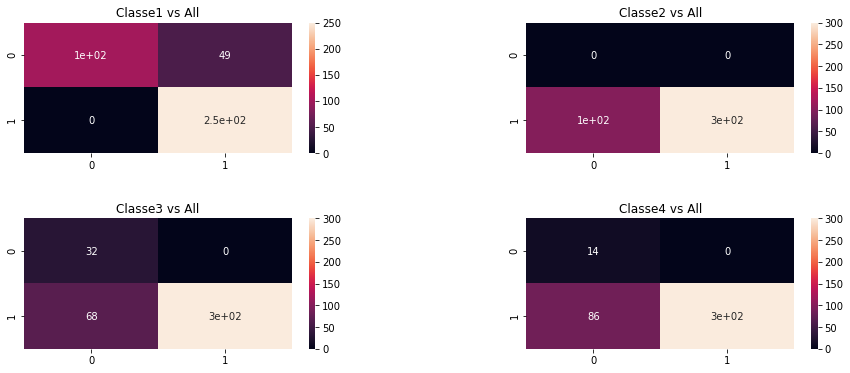

In [111]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.title(" Matrice de confusion")
#
plt.subplot(2,2,1)
plt.title("Classe1 vs All")
data_app=prediction2(class1,dataTp1_App.loc[100:399])
data_test= [1 if x==1 else 2 for x in make_list(clas1,tuple1[99:399])]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,2)
plt.title("Classe2 vs All")
data_app=prediction2(class2,np.concatenate((class1,dataTp1_App.loc[200:399])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,3)
plt.title("Classe3 vs All")
data_app=prediction2(class3,np.concatenate((class4,dataTp1_App.loc[0:199])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]        
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)
#
plt.subplot(2,2,4)
plt.title("Classe4 vs All")
data_app=prediction2(class4,dataTp1_App.loc[0:299])
data_test= [1 if x==1 else 2 for x in make_list(tuple1[0:300],clas4)]          
sn.heatmap(confusion_matrix(data_app,data_test),annot=True)      
plt.show()

### b) Taux de bonne classification

In [112]:
data_app=prediction2(class1,dataTp1_App.loc[100:399])
data_test= [1 if x==1 else 2 for x in make_list(clas1,tuple1[99:399])]  
print("Le taux de bonne classification Classe1 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
ata_app=prediction2(class2,np.concatenate((class1,dataTp1_App.loc[200:399])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]]  
print("Le taux de bonne classification Classe2 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
data_app=prediction2(class3,np.concatenate((class4,dataTp1_App.loc[0:199])))
data_test= [1 if x==1 else 2 for x in tuple1[0:400]] 
print("Le taux de bonne classification Classe3 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()
data_app=prediction2(class4,dataTp1_App.loc[0:299])
data_test= [1 if x==1 else 2 for x in make_list(tuple1[0:300],clas4)] 
print("Le taux de bonne classification Classe4 vs All est : {} %".format(tauxBonneClassification3(confusion_matrix(data_app,data_test))))
print()

Le taux de bonne classification Classe1 vs All est : 87.75 %

Le taux de bonne classification Classe2 vs All est : 87.5 %

Le taux de bonne classification Classe3 vs All est : 83.0 %

Le taux de bonne classification Classe4 vs All est : 78.5 %



### Moyenne Taux de bonne classification

In [114]:
Taux_moyen_BonneClassification=(87.75 + 87.5 + 83 + 78.5)/4
#
print("Taux moyen de Bonne Classification: {}".format(Taux_moyen_BonneClassification))

Taux moyen de Bonne Classification: 84.1875


### COMMENTAIRES

Le taux de bonne classification est faible pour ce jeu de données. Il nous est difficile de pouvoir observer la séparation de classes par l'hyperplan sur le graphique.

En comparant le taux moyen de bonne classification,nous remarquons comme pour les précédents jeu de données que pour la stratégie One vs One, le taux est bien meilleur soit 90.35 pourcents face à 84.1875 pour la stratégie One vs All.

## IV. Comparer l’ensemble des solutions possibles sur les 3 jeux de données.

1. One vs One (3 DATASETS)

Plus les données sont bruitées(mélangés), moins bon est la performance du modèle pour les 5 classes.En moyenne, nous avons pour les 3 datasets respectivement les pourcentages de 100, 98.95 et 90.35 .  


2. One vs All (3 datasets)

Plus les données sont bruitées(mélangés), moins bon est la performance du modèle pour les 5 classes.En moyenne, nous avons pour les 3 datasets respectivement les pourcentages de 99.43, 93.375, 84.1875 .

 ==> Nous pouvons dire que l'algorithme de perceptron linéaire n'est pas adapté pour le jeux de données 3 avec 5 classes.
 
3. (One vs One) vs (One vs All) :

Pour mieux entrainer un modèle avec le perceptron linéaire,il vaut mieux adapter la stratégie (One vs One). La deuxième étant suscetible d'erreurs lors du test. 

Les résultats de nos expériences nous le prouvent.



### Afin de comparer les résultats du perceptron linéaire à ceux du perceptron multi-couche, présentons en deuxième lieu le tp sur le perceptron multi-couche.

##  TRAVAIL PRATIQUE NUMERO 2 : PERCEPTRON MULTI-COUCHE(MLP)

In [1]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from numpy import exp
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# I. Jeu de données Tp1

In [2]:
# Importation Données Apprentisage
dataTp1=pd.read_csv('data_tp1_app.txt',delimiter=' ',header=None)
#dataTp1=dataTp1.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp1.loc[0:100]
class2=dataTp1.loc[100:200]
class3=dataTp1.loc[200:300]
class4=dataTp1.loc[300:400]
class5=dataTp1.loc[400:500]
#

# Importation Données Test
dataTpTest=pd.read_csv('data_tp1_dec.txt',delimiter=' ',header=None)
#dataTpTest=data2.drop(columns=[0])

# SEPARATION EN CLASSE

clas1=dataTpTest.iloc[0:100]
clas2=dataTpTest.iloc[100:200]
clas3=dataTpTest.iloc[200:300]
clas4=dataTpTest.iloc[300:400]
clas5=dataTpTest.iloc[400:500]

In [3]:
X_train=dataTp1.loc[:,1:]
y_train=dataTp1.loc[:,0]
X_test=dataTpTest.loc[:,1:]
y_test=dataTpTest.loc[:,0]

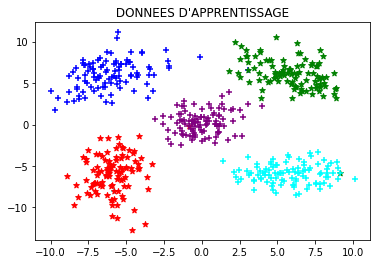

In [172]:
A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+')]
plt.title(" DONNEES D'APPRENTISSAGE ")
plt.show()

### Fonction qui transforme les données en n+1 dimensions soit 3 dimensions.

In [173]:
def transformation3D(donnees):
    x=donnees.shape[0]
    un=np.ones((x,1))
    data=np.hstack((donnees,un))
    return data
#
transformation3D(X_train)

array([[-6.315382,  6.344938,  1.      ],
       [-4.943573,  7.821684,  1.      ],
       [-8.920876,  2.705258,  1.      ],
       ...,
       [-2.243814, -0.673345,  1.      ],
       [-0.489892,  0.282347,  1.      ],
       [ 0.310185,  0.024044,  1.      ]])

### Fonction d'activation

In [174]:
def sigmoide(v):
    activ_phi=1/(1+np.exp(-v))
    return activ_phi

sigmoide(2)

0.8807970779778823

In [175]:
def mlp(Couch_Entree,Couche_Cachee,Couche_Sortie,data,label,etat,sigmoide,epochs):
    x=data.shape[0]
    un=np.ones((x,1))
    tab_erreurQ=[]
    #
    tab_un=np.random.seed(1)
    tab_un=np.random.uniform(-0.5,0.5,(Couch_Entree+1,Couche_Cachee))
    tab_deux=np.random.seed(1)
    tab_deux=np.random.uniform(-0.5,0.5,(Couche_Cachee+1,Couche_Sortie))
    #
    for epoch in range(epochs):
        E_H=sigmoide(data@tab_un)
        E_H=np.hstack((E_H,un))
        H_S=sigmoide(E_H@tab_deux)
    #
        I=np.array([np.where(i==label-1,1,0) for i in range(np.unique(label).size)]).T
    #
        Erreur_sortie=H_S-I
    #
        sigma_entree=Erreur_sortie*H_S*(1-H_S)
    #
        sigma_cachee=((sigma_entree@tab_deux.T)*E_H*(1-E_H))[:,:-1]
    #
        tab_un=tab_un - etat*(data.T@sigma_cachee)
    #
        tab_deux=tab_deux - etat*(E_H.T@sigma_entree)
    #   
        erreurQ=(Erreur_sortie**2).mean()
    #
        tab_erreurQ.append(erreurQ)
    
    return tab_un,tab_deux,tab_erreurQ

In [176]:
data=transformation3D(X_train)
label=y_train
a,b,c=mlp(2,4,5,data,label,0.01,sigmoide,500)

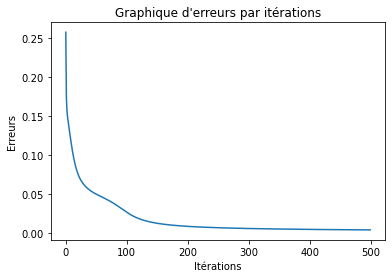

In [177]:
plt.plot(range(0, 500), c)
plt.title("Graphique d'erreurs par itérations")
plt.xlabel('Itérations')
plt.ylabel('Erreurs')
plt.show()

### COMMENTAIRE:

Nous pouvons observer sur ce grphique que l'erreur diminue après un certains nombre d'itérations jusqu'à se stationner et envoisiner zéro.

### Importer les données de test.

In [178]:
data_Test=transformation3D(X_test)

Après avoir entrainé notre modèle, implementons la fonction qui, à l'aide de paramètre du modèle nous donne une prédiction sur les données de test.

In [179]:
def true_classification(mlp,dataTest):
    tab_un,tab_deux,c=mlp
    #
    x=dataTest.shape[0]
    un=np.ones((x,1))
    #
    E_H=sigmoide(dataTest@tab_un)
    E_H=np.hstack((E_H,un))
    H_S=sigmoide(E_H@tab_deux)
    class_P=np.argmax(H_S,axis=1)+1
    return class_P
#

true_classification(mlp(2,4,5,data,label,0.01,sigmoide,500),data_Test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

### EVALUATION DES PERFORMANCES

## a) Matrice de confusion

In [180]:
y_test=true_classification(mlp(2,4,5,data,label,0.01,sigmoide,500),data_Test)
confusion_matrix(y_train,y_test)

array([[ 99,   0,   0,   0,   1],
       [  0,  99,   0,   0,   1],
       [  0,   0,  99,   0,   1],
       [  0,   0,   0, 100,   0],
       [  0,   0,   0,   0, 100]], dtype=int64)

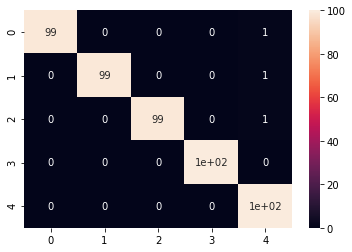

In [181]:
sn.heatmap(confusion_matrix(y_train,y_test),annot=True)
plt.show()

In [182]:
def tauxBonneClassification(ConfMatrice):
    n=len(ConfMatrice)
    sommeDiag=0
    for i in range(n):
        for j in range(n):
            if i==j:
                sommeDiag +=ConfMatrice[i,j]
    taux=sommeDiag/5
    return taux

In [183]:
print("Le taux de bonne classification Classe1 vs All est : {} %".format(tauxBonneClassification(confusion_matrix(y_train,y_test))))

Le taux de bonne classification Classe1 vs All est : 99.4 %


### COMPARAISON AVEC LA FONCTION DE SKLEARN

In [184]:
model = MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))
b=model.fit(X_train, y_train)
#print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

#print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(predicted_y,expected_y))


a=model.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(a))


[[ 99   0   0   0   0]
 [  0  99   0   0   1]
 [  0   0  99   0   1]
 [  0   0   0 100   0]
 [  0   0   0   0 101]]
Le taux de bonne classification est 0.996


### NOTA

1. Notre algorithme implémenté nous renvoie un taux de bonne classification de 99.4 pourcents contre 99.6 pourcents pour celui de sklearn.

2. Cette différence serait sans doute dûe aux poids d'initialisation(poids de départ) car la convergence de l'algorithme en dépend également.


### Nous allons à présent varier le nombre de couches cachés et observer la variation du taux de bonne classification

[55.2, 91.2, 97.2, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.6]


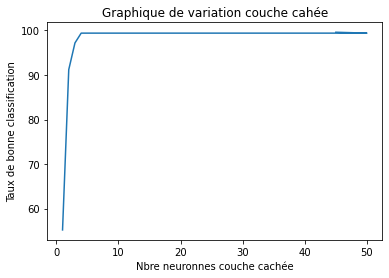

In [185]:
data=transformation3D(X_train)
label=y_train

#
tab_tbc=[]
tab=[1,2,3,4,5,10,20,30,45,50]
for tbc in range(len(tab)):
    y_test=true_classification(mlp(2,tab[tbc],5,data,label,0.01,sigmoide,500),data_Test)
    tab_tbc.append(tauxBonneClassification(confusion_matrix(y_train,y_test)))    
print(tab_tbc)        
#
plt.plot(tab,tab_tbc)
plt.title("Graphique de variation couche cahée")
plt.xlabel('Nbre neuronnes couche cachée')
plt.ylabel('Taux de bonne classification')
plt.show()

### COMMENTAIRES 


Avec 4 couches cachées nous voyons que l'erreur ou le taux de bonne classification ne varie plus ou presque plus.

Pour cette configuration du réseau de neuronnes, rien ne sert d'augmenter le nombre de neuronnes de la couche cachée à un nombre supérieur à 4. Puisque avec 4 neuronnes déjà, on résoudre tous les problèmes de classification.

### AFFICHAGE DE FRONTIERES DE DECISION

In [186]:
def plot_decision_frontiers(classifieur,baseApp):
    #x=np.c_[baseApp[0],baseApp[1]]
    X_train=baseApp.loc[:,1:2]
    y_train=baseApp.loc[:,0]
    min1, max1 = baseApp.loc[:, 1].min()-1, baseApp.loc[:, 1].max()+1
    min2, max2 = baseApp.loc[:, 2].min()-1, baseApp.loc[:, 2].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2),1))
    grid = np.hstack((r1,r2))
    classifieur = classifieur.fit(X_train,y_train)
    yhat =classifieur.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='Paired')
    target=y_train.unique()
    for class_value in range(1,6):
        row_ix = np.where(y_train== class_value)
        plt.scatter(baseApp.loc[row_ix, 1], baseApp.loc[row_ix, 2],label="Classe {}".format(class_value))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
#

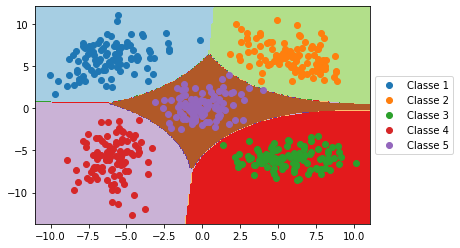

In [187]:
baseApp=dataTp1 
classifieur=MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))#tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)

# II. Jeu de données Tp2

In [188]:
# Importation Données Apprentisage
dataTp2=pd.read_csv('data_tp2_app.txt',delimiter=' ',header=None)

## SEPARATION EN CLASSE

class1=dataTp2.loc[0:100]
class2=dataTp2.loc[100:200]
class3=dataTp2.loc[200:300]
class4=dataTp2.loc[300:400]
class5=dataTp2.loc[400:500]
#

# Importation Données Test
dataTpTest=pd.read_csv('data_tp2_dec.txt',delimiter=' ',header=None)
#dataTpTest=data2.drop(columns=[0])

# SEPARATION EN CLASSE

clas1=dataTpTest.iloc[0:100]
clas2=dataTpTest.iloc[100:200]
clas3=dataTpTest.iloc[200:300]
clas4=dataTpTest.iloc[300:400]
clas5=dataTpTest.iloc[400:500]

In [189]:
X_train=dataTp2.loc[:,1:]
y_train=dataTp2.loc[:,0]
X_test=dataTpTest.loc[:,1:]
y_test=dataTpTest.loc[:,0]

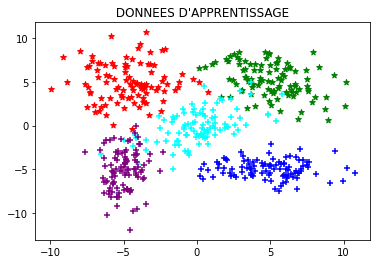

In [190]:
A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+')]
plt.title(" DONNEES D'APPRENTISSAGE ")
plt.show()

In [191]:
data=transformation3D(X_train)
label=y_train
a,b,c=mlp(2,4,5,data,label,0.01,sigmoide,500)

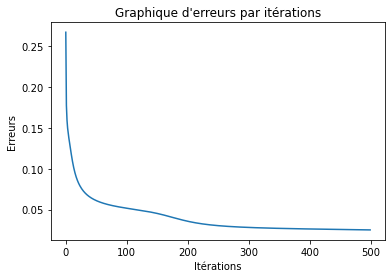

In [192]:
plt.plot(range(0, 500), c)
plt.title("Graphique d'erreurs par itérations")
plt.xlabel('Itérations')
plt.ylabel('Erreurs')
plt.show()

In [193]:
data_Test=transformation3D(X_test)
y_test=true_classification(mlp(2,4,5,data,label,0.01,sigmoide,10000),data_Test)
confusion_matrix(y_train,y_test)

array([[99,  0,  1,  0,  0],
       [ 2, 97,  1,  0,  0],
       [ 0,  5, 86,  2,  7],
       [ 0,  0,  3, 97,  0],
       [ 1,  0,  1,  0, 98]], dtype=int64)

In [194]:
print("Le taux de bonne classification Classe1 vs All est : {} %".format(tauxBonneClassification(confusion_matrix(y_train,y_test))))

Le taux de bonne classification Classe1 vs All est : 95.4 %


### COMPARAISON AVEC LA FONCTION DE SKLEARN

In [198]:
model = MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))
b=model.fit(X_train, y_train)
#print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

#print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(predicted_y,expected_y))


a=model.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(a))


[[ 99   0   4   0   0]
 [  0 100   0   0   0]
 [  2   1  87   0   1]
 [  0   1   0  99   0]
 [  1   0   1   0 104]]
Le taux de bonne classification est 0.978


### NOTA

1. Notre algorithme implémenté nous renvoie un taux de bonne classification de 95.4 pourcents contre 97.8 pourcents pour celui de sklearn.

2. Cette différence serait sans doute dûe aux poids d'initialisation(poids de départ) car la convergence de l'algorithme en dépend également.

### Variation du nombre de couches cachés et observation de la variation du taux de bonne classification

[48.8, 86.2, 92.8, 93.6, 93.8, 94.8, 94.6, 95.0, 94.8, 95.0]


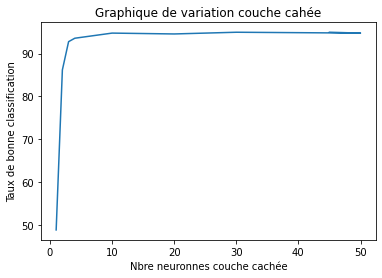

In [202]:
data=transformation3D(X_train)
label=y_train

#
tab_tbc=[]
tab=[1,2,3,4,5,10,20,30,45,50]
for tbc in range(len(tab)):
    y_test=true_classification(mlp(2,tab[tbc],5,data,label,0.01,sigmoide,1000),data_Test)
    tab_tbc.append(tauxBonneClassification(confusion_matrix(y_train,y_test)))    
print(tab_tbc)        
#
plt.plot(tab,tab_tbc)
plt.title("Graphique de variation couche cahée")
plt.xlabel('Nbre neuronnes couche cachée')
plt.ylabel('Taux de bonne classification')
plt.show()

### COMMENTAIRES

Nous remarquons que l'erreur diminue et stagne après un certain nomre d'itérations.

Nous tenons à signaler que pour le graphique ci-haut, nous avons reduit le nombre d'itérations à cause du temps d'execution très grand; contrairement au taux de bonne classification calculé bien avant. 

Nous devons également signaler que le convergence de la méthode ne dépend pas seulement de nombre de couches cachées mais aussi du nombre d'itérations et surtout du facteur "eta"

### AFFICHAGE DE FRONTIERES DE DECISION

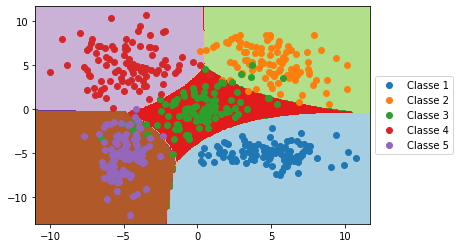

In [203]:
baseApp=dataTp2 
classifieur=MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))#tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)

# III. Jeu de données Tp3

In [204]:
# Importation Données Apprentisage
dataTp3=pd.read_csv('data_tp3_app.txt',delimiter=' ',header=None)
#dataTp1=dataTp1.drop(columns=[0])
#
## SEPARATION EN CLASSE

class1=dataTp3.loc[0:100]
class2=dataTp3.loc[100:200]
class3=dataTp3.loc[200:300]
class4=dataTp3.loc[300:400]
class5=dataTp3.loc[400:500]
#

# Importation Données Test
dataTpTest=pd.read_csv('data_tp3_dec.txt',delimiter=' ',header=None)
#dataTpTest=data2.drop(columns=[0])

# SEPARATION EN CLASSE

clas1=dataTpTest.iloc[0:100]
clas2=dataTpTest.iloc[100:200]
clas3=dataTpTest.iloc[200:300]
clas4=dataTpTest.iloc[300:400]
clas5=dataTpTest.iloc[400:500]

In [205]:
X_train=dataTp3.loc[:,1:]
y_train=dataTp3.loc[:,0]
X_test=dataTpTest.loc[:,1:]
y_test=dataTpTest.loc[:,0]

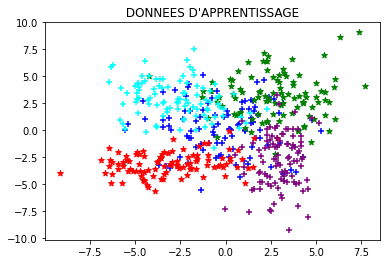

In [206]:
A=[plt.scatter(class1[1],class1[2], c = 'blue', marker = '+')
    ,plt.scatter(class2[1],class2[2], c = 'green', marker = '*')
    ,plt.scatter(class3[1],class3[2], c = 'cyan', marker = '+')
    ,plt.scatter(class4[1],class4[2], c = 'red', marker = '*')
    ,plt.scatter(class5[1],class5[2], c = 'purple', marker = '+')]
plt.title(" DONNEES D'APPRENTISSAGE ")
plt.show()

In [207]:
data=transformation3D(X_train)
label=y_train
a,b,c=mlp(2,4,5,data,label,0.01,sigmoide,500)

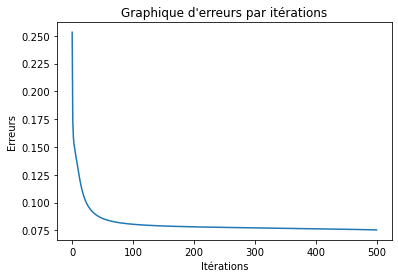

In [208]:
plt.plot(range(0, 500), c)
plt.title("Graphique d'erreurs par itérations")
plt.xlabel('Itérations')
plt.ylabel('Erreurs')
plt.show()

In [209]:
data_Test=transformation3D(X_test)
y_test=true_classification(mlp(2,4,5,data,label,0.01,sigmoide,10000),data_Test)
confusion_matrix(y_train,y_test)

array([[38, 20, 16, 14, 12],
       [ 7, 85,  3,  0,  5],
       [12,  5, 81,  2,  0],
       [14,  0, 12, 73,  1],
       [ 5,  8,  0,  2, 85]], dtype=int64)

In [210]:
print("Le taux de bonne classification Classe1 vs All est : {} %".format(tauxBonneClassification(confusion_matrix(y_train,y_test))))

Le taux de bonne classification Classe1 vs All est : 72.4 %


### COMPARAISON AVEC LA FONCTION DE SKLEARN

In [211]:
model = MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))
b=model.fit(X_train, y_train)
#print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

#print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(predicted_y,expected_y))


a=model.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(a))

[[ 73   3   8   3   1]
 [  1 113   0   0   1]
 [  0   2 104   1   0]
 [  0   0   0  85   0]
 [  2   0   0   2 101]]
Le taux de bonne classification est 0.952


### NOTA

Notre algorithme implémenté nous renvoie un taux de bonne classification de 72.4 pourcents contre 95.2 pourcents pour celui de sklearn.

Cette différence serait sans doute dûe aux poids d'initialisation(poids de départ), au nombre d'itérations, et au facteur "eta" car la convergence de l'algorithme en dépend.

### Variation du nombre de couches cachés et observation de la variation du taux de bonne classification

[38.6, 69.6, 70.2, 70.8, 71.6, 71.6, 71.4, 71.4, 71.0, 71.4]


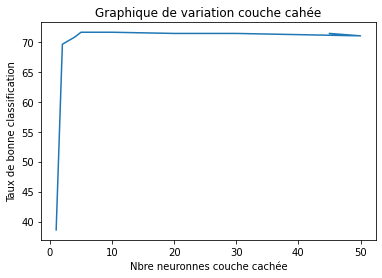

In [215]:
data=transformation3D(X_train)
label=y_train

#
tab_tbc=[]
tab=[1,2,3,4,5,10,20,30,45,50]
for tbc in range(len(tab)):
    y_test=true_classification(mlp(2,tab[tbc],5,data,label,0.01,sigmoide,1000),data_Test)
    tab_tbc.append(tauxBonneClassification(confusion_matrix(y_train,y_test)))    
print(tab_tbc)        
#
plt.plot(tab,tab_tbc)
plt.title("Graphique de variation couche cahée")
plt.xlabel('Nbre neuronnes couche cachée')
plt.ylabel('Taux de bonne classification')
plt.show()

## COMMENTAIRES

Nous remarquons que l'erreur diminue et stagne après un certain nomre d'itérations.

Nous tenons à signaler que pour le graphique ci-haut, nous avons reduit le nombre d'itérations à cause du temps d'execution très grand; contrairement au taux de bonne classification calculé bien avant.

Nous devons également signaler que le convergence de la méthode ne dépend pas seulement de nombre de couches cachées mais aussi du nombre d'itérations et surtout du facteur "eta"

### AFFICHAGE DE FRONTIERES DE DECISION

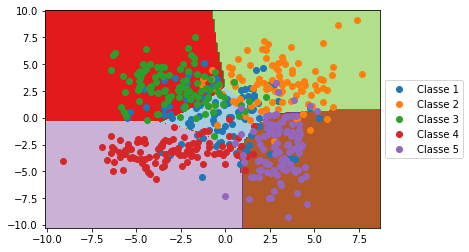

In [216]:
baseApp=dataTp3 
classifieur=MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))#tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)

## AFFICHAGE DE 3 DATASETS

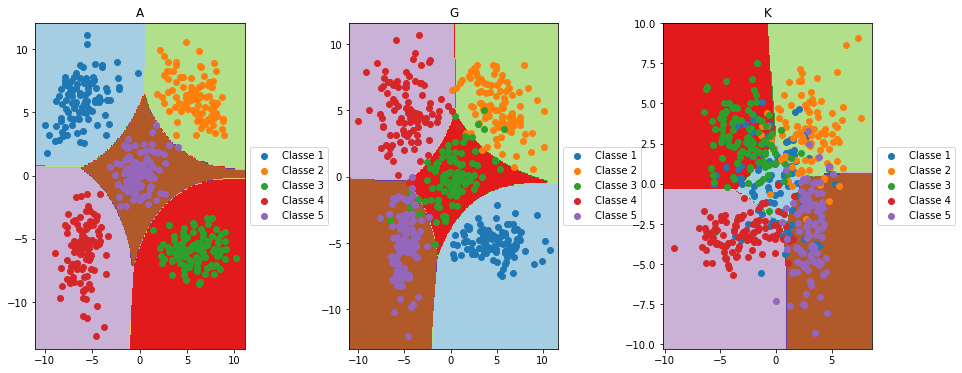

In [217]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.subplot(1,3,1)
plt.title("A")
baseApp=dataTp1 #make_moons(n_samples=500,noise=0.2, random_state=None)
classifieur=MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))#tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)
#
plt.subplot(1,3,2)
plt.title("G")
baseApp=dataTp2 #make_moons(n_samples=500,noise=0.2, random_state=None)
classifieur=MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))#tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)
#
plt.subplot(1,3,3)
plt.title("K")
baseApp=dataTp3 #make_moons(n_samples=500,noise=0.2, random_state=None)
classifieur=MLPClassifier(max_iter=500,random_state=1,activation='logistic',hidden_layer_sizes=(100,))#tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)

## COMPARAISON DE MLP vs PERCEPTRON LINEAIRE

1. Le mlp nous donne en générale un taux de bonne classification différent de 100 pourcents(peu importe la distribution de données).
Nous pouvons estimer ce modèle meilleur par raport à celui du perceptron linéaire. Un bon modèle de classification n'est pas celui qui annule mais plutot celui qui la minimise.

Un modèle pour lequel l'erreur est nulle n'est généralisé et a tendance à surapprendre.
Donc, le perceptron a tendance à surapprendre par rapport au mlp.

2. Le mlp s'adapte à la distribution de données alors que le perceptron ne le fait pas.
C'est pourquoi pour les jeux de données non linéairement séparable(2 et 3), le mlp nous donne les meilleurs taux de bonne classification. C'est le modèle approprié pour ces données.


3. En terme de temps d'execution, le perceptron est moins couteux, simple et rapide que le mlp.

## TRAVAIL PRATIQUE NUMERO 3 : ARBRE DE DECISION

## 1. Préparation de l’environnement

In [383]:
from sklearn import datasets, tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pydotplus
import collections
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_moons
import numpy as np
import seaborn as sns

## 2. Construire et visualiser un arbre de décision

In [384]:
#Charger la base de données iris

data_iris=datasets.load_iris()
data, classe = data_iris.data,data_iris.target

In [385]:
#Entrainement de données par la fonction sklearn Arbre de décision
clfT = tree.DecisionTreeClassifier()
clfT = clfT.fit(data,classe)

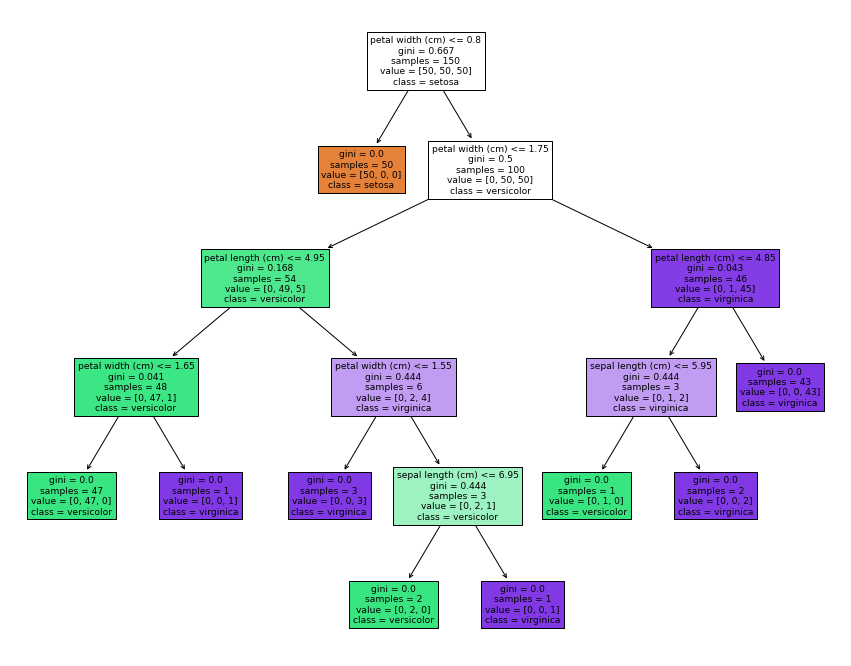

In [386]:
#Affichage de l'arbre de décision

plt.figure(1,figsize=(15,12))
_ = tree.plot_tree(clfT,feature_names=data_iris.feature_names,class_names=data_iris.target_names,filled=True)

### Exporter la structure de l’arbre dans un fichier .dot. 

In [387]:
dot_data = tree.export_graphviz(clfT, out_file='ArbreDecision.dot')

### 3. Comparaison de classifieurs

In [388]:
#Séparation de données d'apprentissage et de tests : X :data y: labels

X_train, X_test, y_train, y_test = train_test_split(data, classe, test_size=0.2,random_state=0)

### Distribution des données

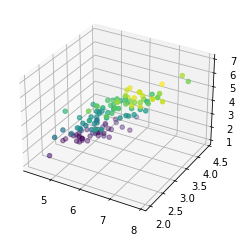

In [389]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1],X_train[:,2], c=X_train[:,3]);

### a) Apprentissage avec Arbre de décision

In [390]:
#Entrainement avec les données d'apprentissage
clfA = tree.DecisionTreeClassifier()
clfA = clfA.fit(X_train,y_train)

# Taux de bonne classification
a=clfA.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(a))

Le taux de bonne classification est 1.0


### b) Apprentissage avec GaussianNB

In [391]:
clfG = GaussianNB()
clfG.fit(X_train, y_train)

#Taux de bonne classification
g=clfG.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(g))

Le taux de bonne classification est 0.9666666666666667


### Fonction qui permet de déterminer le meilleur k pour kppv

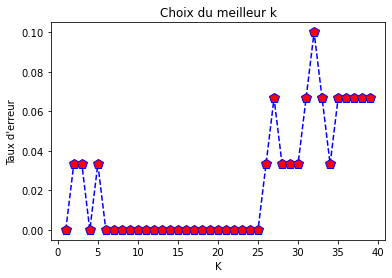

In [392]:
def determinK(X_train,y_train,X_test,y_test):
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
#
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='p',markerfacecolor='red', markersize=10)
    plt.title('Choix du meilleur k')
    plt.xlabel('K')
    plt.ylabel("Taux d'erreur")
#
determinK(X_train,y_train,X_test,y_test)

### Le meilleur k étant celui qui minimise l'erreur. Dans notre cas, il en a plusieurs. Nous pouvons prendre k=7.

### c) Apprentissage avec KNeighborsClassifier

In [393]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

#Taux de bonne classification
k=neigh.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 1.0


### COMMENTAIRES:

Après le test, nous remarquons que la méthode gaussienne nous renvoie le plus faible taux de bonne classification par rapport aux deux autres méthodes.

## Validation Croisée ( KFolds avec k=5)

La validation croisée K-fold est une méthode d'estimation des performances d'un modèle sur des données d'apprentissage. C'est une technique utilisée pour le réglage des hyperparamètres de telle sorte que le modèle avec la valeur la plus optimale des hyperparamètres puisse être entraîné.

### a) Arbre de décision

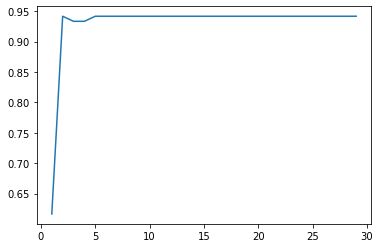

In [394]:
cv=KFold(5)
tab_leaf=[]
for i in range(1,30):
    scorel=cross_val_score(tree.DecisionTreeClassifier(random_state=12,max_depth=i),X_train, y_train,cv=cv)
    tab_leaf.append(scorel.mean())
#
plt.plot(range(1,30),tab_leaf)
plt.show()

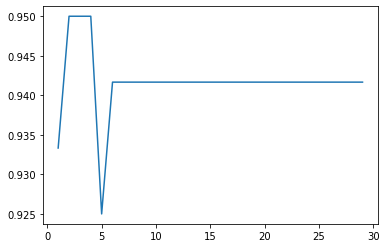

In [395]:
cv=KFold(5)
tab_leaf=[]
for i in range(1,30):
    scorel=cross_val_score(tree.DecisionTreeClassifier(random_state=1,min_samples_leaf=i),X_train, y_train,cv=cv)
    tab_leaf.append(scorel.mean())
#
plt.plot(range(1,30),tab_leaf)
plt.show()

In [396]:
m = tree.DecisionTreeClassifier(random_state=0,max_depth=6)
m.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=m.predict(X_test)
k=m.score(X_test,KPPpredict)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 1.0


In [397]:
m = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=4)
m.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=m.predict(X_test)
k=m.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 1.0


In [398]:
cv=KFold(5)
scoreK=cross_val_score(tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=4),X_train,y_train,cv=cv)
print("Scross Validation Arbre de décision :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation Arbre de décision :[0.95833333 0.91666667 0.95833333 1.         0.91666667]

 Accuracy: 0.95 (+/- 0.0311804782231162) 


### COMMENTAIRES

La moyenne des résultats de classification corrects pour ce classifieur est de 95 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. 
Le modèle est donc assez stable.

### b) GaussianNB

In [399]:
cv=KFold(n_splits=5,random_state=1,shuffle=True)
scoreG=cross_val_score(GaussianNB(),X_train,y_train,cv=cv)
print("Scross Validation GaussianNB : {}".format(scoreG))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreG.mean(), scoreG.std()))

Scross Validation GaussianNB : [0.95833333 0.91666667 0.95833333 0.91666667 0.91666667]

 Accuracy: 0.9333333333333333 (+/- 0.020412414523193187) 


### COMMENTAIRES

La moyenne des résultats de classification corrects pour ce classifieur est de 93 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. Le modèle est donc assez stable.

### c) KNeighborsClassifier

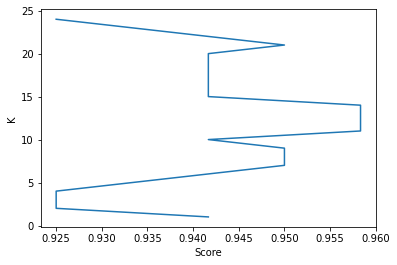

In [400]:
cv=KFold(5)
tab_k=[]
for i in range(1,25):
    scoreK=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=cv)
    tab_k.append(scoreK.mean())

plt.plot(tab_k,range(1,25))
plt.xlabel('Score')
plt.ylabel('K')
plt.show()

In [401]:
cv=KFold(5)
scoreK=cross_val_score(KNeighborsClassifier(n_neighbors=13),X_train,y_train,cv=cv)
print("Scross Validation KNeighborsClassifier :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation KNeighborsClassifier :[0.95833333 0.95833333 1.         1.         0.875     ]

 Accuracy: 0.9583333333333334 (+/- 0.045643546458763846) 


In [402]:
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=neigh.predict(X_test)
k=neigh.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 1.0


### COMMENTAIRES

1. La moyenne des résultats de classification corrects pour ce classifieur est de 95.8 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. Le modèle est donc assez stable.


2. Les résultats du cross validation sont une preuve que le modèle gaussien pour ce jeu de données présente un faible taux de bonne classification.

## AUTRES JEUX DE DONNEES

### 1. Data Cancer

In [403]:
data_cancer=datasets.load_breast_cancer()
data2, classe2 = data_cancer.data,data_cancer.target

X_train, X_test, y_train, y_test = train_test_split(data2, classe2, test_size=0.2,random_state=0)

### Distribution des données

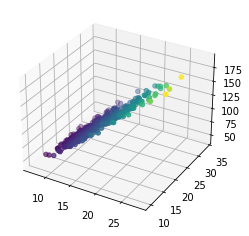

In [404]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1],X_train[:,2], c=X_train[:,3]);

### a) Arbre de décision

In [405]:
cv=KFold(5)
tab_leaf=[]
for i in range(1,30):
    scorel=cross_val_score(tree.DecisionTreeClassifier(random_state=1,min_samples_leaf=i),X_train, y_train,cv=cv)
    tab_leaf.append(scorel.mean())
#

In [406]:
m = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=7)
m.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=m.predict(X_test)
k=m.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.9473684210526315


In [407]:
cv=KFold(5)
scoreK=cross_val_score(tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=7),X_train,y_train,cv=cv)
print("Scross Validation Arbre de décision :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation Arbre de décision :[0.94505495 0.91208791 0.9010989  0.93406593 0.94505495]

 Accuracy: 0.9274725274725275 (+/- 0.017855029460738362) 


## COMMENTAIRE:

La moyenne des résultats de classification corrects pour ce classifieur est de 92 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. Le modèle est donc assez stable.

### b) GaussianNB

In [408]:
cv=KFold(5)
scoreG=cross_val_score(GaussianNB(),X_train,y_train,cv=cv)
print("Scross Validation GaussianNB : {}".format(scoreG))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreG.mean(), scoreG.std()))

Scross Validation GaussianNB : [0.93406593 0.96703297 0.91208791 0.93406593 0.95604396]

 Accuracy: 0.9406593406593406 (+/- 0.019159995356222752) 


### c) KNeighborsClassifier

In [409]:
cv=KFold(5)
tab_k=[]
for i in range(1,25):
    scoreK=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=cv)
    tab_k.append(scoreK.mean())


In [410]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=neigh.predict(X_test)
k=neigh.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.9649122807017544


In [411]:
cv=KFold(5)
scoreK=cross_val_score(KNeighborsClassifier(n_neighbors=9),X_train,y_train,cv=cv)
print("Scross Validation KNeighborsClassifier :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation KNeighborsClassifier :[0.96703297 0.9010989  0.91208791 0.9010989  0.95604396]

 Accuracy: 0.9274725274725274 (+/- 0.028316700498296984) 


## COMMENTAIRES

1. La moyenne des résultats de classification corrects pour ce classifieur est de 92.3 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. Le modèle est donc assez stable.


2. Pour ce jeu de données, le classifieur gaussien est le meilleur. Suivi de l'Arbre de décision puis kppv.

### 2. Data Digits

In [412]:
data_digits=datasets.load_digits()
data3, classe3 = data_digits.data,data_digits.target
#
X_train, X_test, y_train, y_test = train_test_split(data3, classe3, test_size=0.2,random_state=0)

### Distribution des données

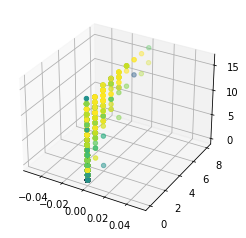

In [413]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1],X_train[:,2], c=X_train[:,3]);

### a) Arbre de décision

In [414]:
cv=KFold(5)
tab_leaf=[]
for i in range(1,30):
    scorel=cross_val_score(tree.DecisionTreeClassifier(random_state=1,min_samples_leaf=i),X_train, y_train,cv=cv)
    tab_leaf.append(scorel.mean())
#

In [415]:
m = tree.DecisionTreeClassifier(random_state=1)
m.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=m.predict(X_test)
k=m.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.8694444444444445


In [416]:
cv=KFold(5)
scoreK=cross_val_score(tree.DecisionTreeClassifier(random_state=1),X_train,y_train,cv=cv)
print("Scross Validation Arbre de décision :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation Arbre de décision :[0.82986111 0.87152778 0.85365854 0.85017422 0.82926829]

 Accuracy: 0.8468979868370112 (+/- 0.01590048152015046) 


### b) GaussianNB

In [417]:
cv=KFold(5)
scoreG=cross_val_score(GaussianNB(),X_train,y_train,cv=cv)
print("Scross Validation GaussianNB : {}".format(scoreG))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreG.mean(), scoreG.std()))

Scross Validation GaussianNB : [0.83680556 0.85416667 0.86062718 0.83623693 0.82229965]

 Accuracy: 0.842027197057685 (+/- 0.013735317556859772) 


### c) KNeighborsClassifier

In [418]:
cv=KFold(5)
tab_k=[]
for i in range(1,25):
    scoreK=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=cv)
    tab_k.append(scoreK.mean())

In [419]:
cv=KFold(5)
scoreK=cross_val_score(KNeighborsClassifier(n_neighbors=3),X_train,y_train,cv=cv)
print("Scross Validation KNeighborsClassifier :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation KNeighborsClassifier :[0.98611111 0.98958333 0.98606272 0.9825784  0.98606272]

 Accuracy: 0.9860796554394116 (+/- 0.0022152260012981493) 


In [420]:
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=neigh.predict(X_test)
k=neigh.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.9722222222222222


## COMMENTAIRES

1. La moyenne des résultats de classification corrects pour ces classifieurs sont respectivement  est de 84.6 84.2 et 98.6 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. Le modèle est donc assez stable.

2.Pour ce jeu de données, le classifieur kppv est le meilleur. Suivi de l'Arbre de décision puis gaussien.

### 3. Data Wine

In [421]:
data_digits=datasets.load_wine()
data4, classe4 = data_digits.data,data_digits.target

X_train, X_test, y_train, y_test = train_test_split(data4, classe4, test_size=0.2,random_state=0)

### Distribution des données

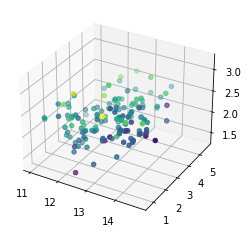

In [422]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1],X_train[:,2], c=X_train[:,3]);

### a) Arbre de décision

In [423]:
cv=KFold(5)
tab_leaf=[]
for i in range(1,30):
    scorel=cross_val_score(tree.DecisionTreeClassifier(random_state=1,min_samples_leaf=i),X_train, y_train,cv=cv)
    tab_leaf.append(scorel.mean())
#

In [424]:
m = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=1)
m.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=m.predict(X_test)
k=m.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.9722222222222222


In [425]:
cv=KFold(5)
scoreK=cross_val_score(tree.DecisionTreeClassifier(random_state=0,min_samples_leaf=4),X_train,y_train,cv=cv)
print("Scross Validation Arbre de décision :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation Arbre de décision :[0.89655172 0.89655172 0.92857143 0.89285714 0.89285714]

 Accuracy: 0.9014778325123153 (+/- 0.013647187366694647) 


### b) GaussianNB

In [426]:
cv=KFold(5)
scoreG=cross_val_score(GaussianNB(),data2, classe2,cv=cv)
print("Scross Validation GaussianNB : {}".format(scoreG))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreG.mean(), scoreG.std()))

Scross Validation GaussianNB : [0.87719298 0.92105263 0.95614035 0.97368421 0.95575221]

 Accuracy: 0.9367644775655954 (+/- 0.03433555112736754) 


### c) KNeighborsClassifier

In [427]:
cv=KFold(5)
tab_k=[]
for i in range(1,25):
    scoreK=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=cv)
    tab_k.append(scoreK.mean())


In [428]:
cv=KFold(5)
scoreK=cross_val_score(KNeighborsClassifier(n_neighbors=1),X_train,y_train,cv=cv)
print("Scross Validation KNeighborsClassifier :{}".format(scoreK))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreK.mean(), scoreK.std()))

Scross Validation KNeighborsClassifier :[0.75862069 0.79310345 0.78571429 0.78571429 0.67857143]

 Accuracy: 0.7603448275862069 (+/- 0.04254458244935251) 


In [429]:
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train, y_train)
#Taux de bonne classification
KPPpredict=neigh.predict(X_test)
k=neigh.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.75


## COMMENTAIRES

1. La moyenne des résultats de classification corrects pour ces classifieurs sont respectivement est de 90 93.6 et 75 pourcents. En se basant sur l'écart- type, nous pouvons dire que les différents taux de bonne classification par strate de cross validation ne varient pas beaucoup. Le modèle est donc assez stable.


2. Pour ce jeu de données, le classifieur est gaussien est le meilleur. Suivi de l'Arbre de décision puis n kppv.

# NOTA:    


Le choix d'un bon classifieur dépend de de la nature ou de la distribution de données que nous utilisons.
C'est pourquoi une étude préalable de ces données est très importante afin de gagner en temps et en performance.

## 4 Visualiser les frontières de décision

### Générer une base de données synthétique en deux dimensions avec la fonction make_moon

C:\Users\ANICET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


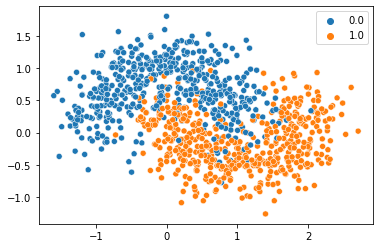

In [497]:
dd=make_moons(n_samples=1000,noise=0.3,random_state=0)
dataSynthet, classeSynthet = dd[0], dd[1]
#
dataSynthet, classeSynthet = dd[0], dd[1]
x=np.c_[dd[0],dd[1]]
y=x[:,2]
sns.scatterplot(x[:,0], x[:,1],hue=x[:,2])

#Séparation de données d'apprentissage et de tests : X :data y: labels
X_train, X_test, y_train, y_test = train_test_split(dataSynthet, classeSynthet, test_size=0.2,random_state=0)

### Apprentissage avec Arbre de décision

In [498]:
#Entrainement avec les données d'apprentissage
clfA = tree.DecisionTreeClassifier(random_state=0)# Penser toujours à fixer random pour arbre de décision afin de spécifier ou commencer la classification.
clfA = clfA.fit(X_train,y_train)
# Taux de bonne classification
#Apredict=clfA.predict(X_test)
a=clfA.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(a))

Le taux de bonne classification est 0.835


### Apprentissage avec GaussianNB

In [499]:
clfG = GaussianNB()
clfG.fit(X_train, y_train)
#Taux de bonne classification

#Gpredict=clfG.predict(X_test)
g=clfG.score(X_test,y_test)
print("Le taux de bonne classification est {}".format(g))

Le taux de bonne classification est 0.82


### Apprentissage avec KNeighborsClassifier

In [500]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
#Taux de bonne classification
#KPPpredict=neigh.predict(X_test)
k=neigh.score(X_test,y_test)
print("Le taux de bonne classification  est {}".format(k))

Le taux de bonne classification  est 0.915


### Fonction plot_decision_frontiers

In [501]:
def plot_decision_frontiers(classifieur,baseApp):
    x=np.c_[baseApp[0],baseApp[1]]
    X_train=x[:,0:2]
    y_train=x[:,2]
    min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
    min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    classifieur = classifieur.fit(X_train,y_train)
    yhat =classifieur.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='Paired')
    for class_value in range(2):
        row_ix = np.where(y_train== class_value)
        plt.scatter(x[row_ix, 0], x[row_ix, 1],label=class_value)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Test de la fonction

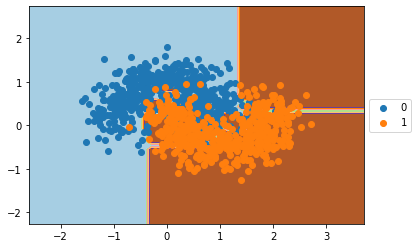

In [502]:
baseApp=dd
classifieur=tree.DecisionTreeClassifier()
plot_decision_frontiers(classifieur,baseApp)

## Affichage  des frontières de décision 

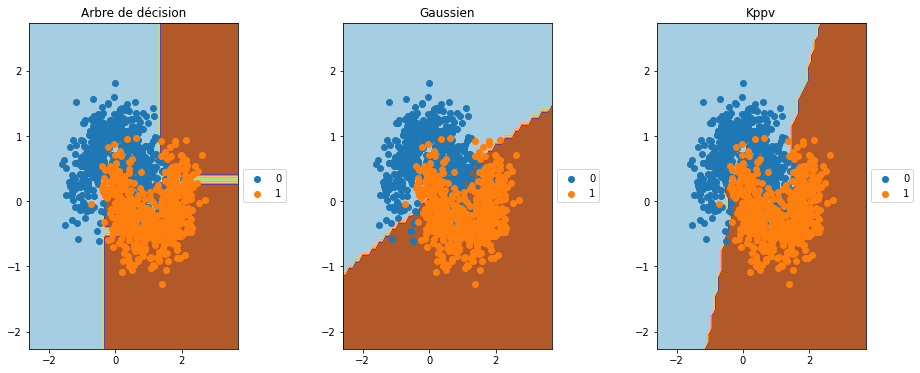

In [503]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

plt.subplot(1,3,1)
plt.title("Arbre de décision")
plot_decision_frontiers(tree.DecisionTreeClassifier(),baseApp)
#
plt.subplot(1,3,2)
plt.title("Gaussien")
plot_decision_frontiers(GaussianNB(),baseApp)
#
plt.subplot(1,3,3)
plt.title("Kppv")
plot_decision_frontiers(KNeighborsClassifier(n_neighbors=11),baseApp)

# COMMENTAIRES

Sur ces données, le classifieur kppv est le meilleur, suivi de l'Arbre de décision puis la gaussienne.

## 5. Étude de paramètres

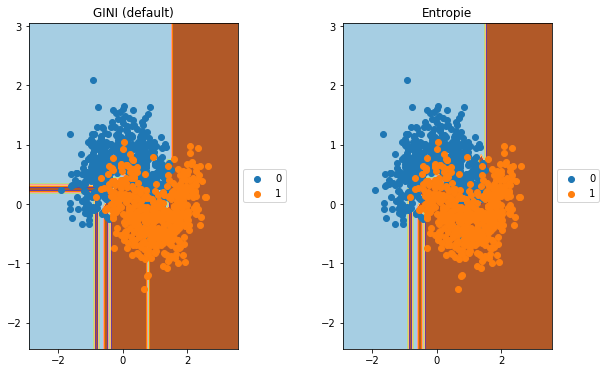

In [504]:
plt.subplots(figsize=(15,6))
plt.gcf().subplots_adjust(wspace = 0.5, hspace = 0.5) 

baseApp=make_moons(n_samples=1000,noise=0.3, random_state=1)

plt.subplot(1,3,1)
plt.title("GINI (default)")
plot_decision_frontiers(tree.DecisionTreeClassifier(criterion='gini'),baseApp)
#
plt.subplot(1,3,2)
plt.title("Entropie")
plot_decision_frontiers(tree.DecisionTreeClassifier(criterion='entropy'),baseApp)

### Estimation de performances

In [505]:
X_train, X_test, y_train, y_test = train_test_split(baseApp[0],baseApp[1], test_size=0.2,random_state=0)

In [511]:
cv=KFold(5)
scoreA=cross_val_score(tree.DecisionTreeClassifier(criterion='gini'),X_train,y_train,cv=cv)
print("Scross Validation Arbre de décision : {}".format(scoreA))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreA.mean(), scoreA.std()))

Scross Validation Arbre de décision : [0.83125 0.86875 0.85    0.86875 0.85625]

 Accuracy: 0.8550000000000001 (+/- 0.013919410907075049) 


In [512]:
cv=KFold(5)
scoreA=cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'),X_train,y_train,cv=cv)
print("Scross Validation Arbre de décision : {}".format(scoreA))
print()
print(" Accuracy: {} (+/- {}) ".format(scoreA.mean(), scoreA.std()))

Scross Validation Arbre de décision : [0.83125 0.8625  0.875   0.8625  0.86875]

 Accuracy: 0.8600000000000001 (+/- 0.015103807466993205) 


### Analysez les résultats

Les deux paramètres sont pratiquement similaires. Dans certains cas, ils produisent les mêmes résultats.

Cependant, L'entropie nous donne des résultats légèrement meilleurs que ceux de gini. Puisque elle donne en moyenne un bon taux de bonne classification.

### Une expérience pour visualiser l’évolution des performances en fonction des valeurs de deux paramètres:

◦ la profondeur maximum de l’arbre de décision ◦ le nombre minimum de données par feuille

In [542]:
tab_leaf=[]
for i in range(1,50):
    scorel=cross_val_score(tree.DecisionTreeClassifier(random_state=1,min_samples_leaf=i),X_train,y_train,cv=cv)
    tab_leaf.append(scorel.mean())
print(tab_leaf)
#
#plt.plot(range(1,50), tab_leaf)
plt.show()

[0.8574999999999999, 0.8637499999999999, 0.8712500000000001, 0.8737499999999999, 0.8712500000000001, 0.88125, 0.8800000000000001, 0.8775000000000001, 0.88375, 0.8862500000000001, 0.88125, 0.88125, 0.88125, 0.88375, 0.88375, 0.885, 0.8862500000000001, 0.88375, 0.8787499999999999, 0.88125, 0.8712500000000001, 0.86875, 0.8700000000000001, 0.8700000000000001, 0.875, 0.875, 0.875, 0.86875, 0.8712500000000001, 0.865, 0.8675, 0.8662500000000002, 0.86875, 0.86875, 0.8662500000000002, 0.85875, 0.85875, 0.8612500000000001, 0.85875, 0.85875, 0.8575000000000002, 0.85625, 0.85625, 0.85375, 0.8487500000000001, 0.8474999999999999, 0.8474999999999999, 0.84375, 0.8425]


In [541]:
tab_leaf=[]
for i in range(1,30):
    scorel=cross_val_score(tree.DecisionTreeClassifier(max_depth=i),X_train,y_train,cv=cv)
    tab_leaf.append(scorel.mean())
print(tab_leaf)
#
#plt.plot(range(1,30), tab_leaf)
plt.show()

[0.8087500000000001, 0.88375, 0.8825000000000001, 0.88375, 0.85875, 0.8724999999999999, 0.86875, 0.8674999999999999, 0.8612499999999998, 0.8712499999999999, 0.8637499999999999, 0.8625, 0.8625, 0.8525, 0.8625, 0.8625, 0.86, 0.865, 0.8625, 0.8574999999999999, 0.8612499999999998, 0.8575000000000002, 0.85625, 0.8625, 0.8625, 0.85875, 0.8574999999999999, 0.8600000000000001, 0.865]


## COMMENTAIRES

Le paramètre  max_depth renseigne sur le nombre maximum entre la racine et la feuille de l'arbre tandisque min_samples_leaf indique le nombre minimum d'échantillons requis pour être à un nœud feuille. Ces paramètres sont importants pour la convergence de l'algorithme.

Plus max_depth est petit, la fonction prend moins de temps d'éxecution et, Plus min_samples_leaf est grand, la fonction prend également moins de temps d'éxecution.